<a href="https://colab.research.google.com/github/WanderingVector/Iowa-Liquor-Sales/blob/main/Final_%7C_Iowa_Liquor_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'iowa-liquor-sales-405513' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=iowa-liquor-sales-405513:US:bquxjob_f0fbe92_18c2bde550b)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_f0fbe92_18c2bde550b') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT * FROM `bigquery-public-data.iowa_liquor_sales.sales` 



# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_f0fbe92_18c2bde550b') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-01331700016,2016-11-02,4864,CLINTON LIQUOR & CONVENIENCE STORE,1641 S BLUFF BLVD,CLINTON,52733,POINT(-90.225022 41.833351),23,CLINTON,...,48099,HENNESSY VS,24,200,6.24,9.36,24,206.64,4.8,1.27
1,S03501700081,2012-01-10,4312,I-80 LIQUOR / COUNCIL BLUFFS,2411 S 24TH ST #1,COUNCIL BLUFFS,51501,POINT(-95.8792 41.238092),78,POTTAWATTAMIE,...,11293,CROWN ROYAL CANADIAN WHISKY,48,200,4.47,6.70,2,13.40,0.4,0.11
2,S29638200229,2015-12-16,2614,HY-VEE #3 FOOD AND DRUGSTORE,1823 E KIMBERLY RD,DAVENPORT,52807,POINT(-90.548919 41.556781),82,SCOTT,...,36908,MCCORMICK VODKA PET,6,1750,7.47,11.21,60,672.60,105.0,27.74
3,INV-14331500014,2018-09-10,4619,SMOKIN' JOE'S #3 TOBACCO AND LIQUOR OUTLET,1737 AVE H,FORT MADISON,52627,POINT(-91.329824 40.63021),56,LEE,...,80571,ARROW PEPPERMINT SCHNAPPS MINI,12,500,4.55,6.83,12,81.96,6.0,1.58
4,INV-13356900003,2018-07-20,5456,OELWEIN MART,801 E CHARLES ST,OELWEIN,50662,POINT(-91.902413 42.678786),33,FAYETTE,...,84171,99 BANANAS,48,100,0.89,1.34,48,64.32,4.8,1.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27711023,S29818300068,2015-12-22,3869,BOOTLEGGIN' BARZINI'S FIN,412 1ST AVE,CORALVILLE,52241,POINT(-91.565517 41.672672),52,JOHNSON,...,28087,BEEFEATER GIN,12,1000,14.49,21.74,2,43.48,2.0,0.53
27711024,S05946700177,2012-06-07,2647,HY-VEE #7 / CEDAR RAPIDS,5050 EDGEWOOD RD,CEDAR RAPIDS,52411,POINT(-91.701581 42.030129),57,LINN,...,59037,DESERT ISLAND LONG ISLAND ICE TEA COCKTAIL,12,1000,3.85,6.03,2,12.06,2.0,0.53
27711025,S25960100037,2015-06-02,4945,OSAGE LIQUORS,"508, MAIN ST",OSAGE,50461,POINT(-92.814028 43.284116),66,MITCHELL,...,52599,E & J VS BRANDY ROUND,12,1000,6.94,10.41,2,20.82,2.0,0.53
27711026,INV-03505300007,2017-02-28,2448,BOTTLE BOUTIQUE,705 E. SECOND,INDIANOLA,50125,POINT(-93.552616 41.358176),91,WARREN,...,64867,FIREBALL CINNAMON WHISKEY,12,1000,11.34,17.01,2,34.02,2.0,0.53


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
results.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,27711028.0,27711028.0,2.771102e+07,2.771102e+07,27711028.0,2.771102e+07,2.771103e+07,2.771103e+07
mean,12.155566,881.964761,1.054191e+01,1.582339e+01,10.766961,1.438071e+02,9.161458e+00,2.417599e+00
std,7.746083,629.341013,1.199210e+01,1.798681e+01,30.258566,5.059222e+02,3.600398e+01,9.511347e+00
min,1.0,0.0,0.000000e+00,0.000000e+00,-648.0,-9.720000e+03,-6.480000e+02,-1.711800e+02
25%,6.0,750.0,5.540000e+00,8.400000e+00,3.0,3.450000e+01,1.500000e+00,4.000000e-01
50%,12.0,750.0,8.330000e+00,1.251000e+01,6.0,7.650000e+01,4.800000e+00,1.260000e+00
75%,12.0,1000.0,1.296000e+01,1.944000e+01,12.0,1.485600e+02,1.050000e+01,2.770000e+00
max,336.0,378000.0,1.843600e+04,2.765400e+04,15000.0,2.795573e+05,1.500000e+04,3.962580e+03


###Renaming the dataset to df

In [ ]:
df=results

###Renaming the columns

In [ ]:
# Rename multiple column names by label
df.rename(columns={'sale_dollars':'Sales', 'state_bottle_cost': 'State Bottle Cost', 'state_bottle_retail': 'State Bottle Retail', 'county_number' :'County Id',' vendor_name': 'Vendor', 'state_bottle_cost': 'State Bottle Cost', 'bottles_sold' : 'Bottles Sold', 'store_name':'Store Name','store_location':'Store Location','zip_code':'Zip','address':'Address','city':'City','category_name':'Brand','category':'Category','bottle_volume_ml':'ML Volume','volume_sold_liters':'Sold Liters','pack':'Pack','item_description':'Item Description','store_name':'Store Name','volume_sold_gallons':'Gallons Sold'}, inplace=True)
print(df.columns)

Index(['invoice_and_item_number', 'date', 'store_number', 'Store Name',
       'Address', 'City', 'Zip', 'Store Location', 'County Id', 'county',
       'Category', 'Brand', 'vendor_number', 'vendor_name', 'item_number',
       'Item Description', 'Pack', 'ML Volume', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sales', 'Sold Liters',
       'Gallons Sold'],
      dtype='object')


###Checking for missing values

In [ ]:
# Check for missing values
df.isnull().sum()

invoice_and_item_number          0
date                             0
store_number                     0
Store Name                       0
Address                      83090
City                         83089
Zip                          83156
Store Location             2497994
County Id                  3578185
county                      159892
Category                     16974
Brand                        25040
vendor_number                    9
vendor_name                      7
item_number                      0
Item Description                 0
Pack                             0
ML Volume                        0
State Bottle Cost               10
State Bottle Retail             10
Bottles Sold                     0
Sales                           10
Sold Liters                      0
Gallons Sold                     0
dtype: int64

###Addressing missing values with forward fill

In [ ]:
# List of columns relevant for time series analysis on 'Sales' and 'Bottles Sold'
time_series_columns = ['Sales', 'Bottles Sold']

# Forward fill missing values for the specified columns
df[time_series_columns] = df[time_series_columns].fillna(method='ffill')

# Check if missing values are resolved
missing_values_after_correction = df[time_series_columns].isnull().sum()

# Display the DataFrame after correction
print(df.head())

# Display the count

  invoice_and_item_number        date store_number  \
0         INV-01331700016  2016-11-02         4864   
1            S03501700081  2012-01-10         4312   
2            S29638200229  2015-12-16         2614   
3         INV-14331500014  2018-09-10         4619   
4         INV-13356900003  2018-07-20         5456   

                                   Store Name             Address  \
0          CLINTON LIQUOR & CONVENIENCE STORE   1641 S BLUFF BLVD   
1                I-80 LIQUOR / COUNCIL BLUFFS   2411 S 24TH ST #1   
2                HY-VEE #3 FOOD AND DRUGSTORE  1823 E KIMBERLY RD   
3  SMOKIN' JOE'S #3 TOBACCO AND LIQUOR OUTLET          1737 AVE H   
4                                OELWEIN MART    801 E CHARLES ST   

             City    Zip               Store Location County Id  \
0         CLINTON  52733  POINT(-90.225022 41.833351)        23   
1  COUNCIL BLUFFS  51501    POINT(-95.8792 41.238092)        78   
2       DAVENPORT  52807  POINT(-90.548919 41.556781)      

###Checking for Duplicates

In [ ]:
# Check for duplicates

dups = df.duplicated()
dups.sum()

0

###Printing Sales Statistics

In [ ]:
import pandas as pd


# Calculate summary statistics for the 'Sales' column
sales_stats = df_filtered['Sales'].describe()

# Print the summary statistics
print("Sales Statistics Summary:")
print(sales_stats)


Sales Statistics Summary:
count    2.553682e+07
mean     1.417250e+02
std      4.944989e+02
min     -9.720000e+03
25%      3.374000e+01
50%      7.488000e+01
75%      1.485000e+02
max      2.795573e+05
Name: Sales, dtype: float64


###Printing Profit Statistics

In [ ]:
import pandas as pd

# Calculate summary statistics for the 'profit' column
profit_stats = df_filtered['profit'].describe()

# Print the summary statistics
print("Profit Statistics Summary:")
print(profit_stats)


Profit Statistics Summary:
count    25536815.0
mean      47.250655
std       165.45697
min        -18912.6
25%           11.25
50%           24.92
75%           49.56
max         93225.6
Name: profit, dtype: Float64


###Creating total_profit column

In [ ]:
import pandas as pd


# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Filter out rows for the year 2023
df_filtered = df[df['date'].dt.year != 2023]

# Now df_filtered contains data without the year 2023
# Reset the index to avoid future issues
df_filtered = df_filtered.reset_index(drop=True)

# Display the resulting DataFrame
print(df_filtered.head())


  invoice_and_item_number       date store_number  \
0         INV-01331700016 2016-11-02         4864   
1            S03501700081 2012-01-10         4312   
2            S29638200229 2015-12-16         2614   
3         INV-14331500014 2018-09-10         4619   
4         INV-13356900003 2018-07-20         5456   

                                   Store Name             Address  \
0          CLINTON LIQUOR & CONVENIENCE STORE   1641 S BLUFF BLVD   
1                I-80 LIQUOR / COUNCIL BLUFFS   2411 S 24TH ST #1   
2                HY-VEE #3 FOOD AND DRUGSTORE  1823 E KIMBERLY RD   
3  SMOKIN' JOE'S #3 TOBACCO AND LIQUOR OUTLET          1737 AVE H   
4                                OELWEIN MART    801 E CHARLES ST   

             City    Zip               Store Location County Id  \
0         CLINTON  52733  POINT(-90.225022 41.833351)        23   
1  COUNCIL BLUFFS  51501    POINT(-95.8792 41.238092)        78   
2       DAVENPORT  52807  POINT(-90.548919 41.556781)        82  

###Calculating, Aggregating, and Printing Total Profit, Total Cost, Total Dollars

In [ ]:
import pandas as pd

# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Fill missing values with zeros for relevant columns
relevant_columns = ['Sales', 'State Bottle Cost', 'Bottles Sold']
df[relevant_columns] = df[relevant_columns].fillna(0)

# Filter data for the desired years
df_filtered = df[(df['date'].dt.year >= 2012) & (df['date'].dt.year != 2023)].copy()

# Calculate the 'total_cost' column
df_filtered.loc[:, 'total_cost'] = df_filtered['State Bottle Cost'] * df_filtered['Bottles Sold']

# Calculate the 'profit' column
df_filtered.loc[:, 'profit'] = df_filtered['Sales'] - df_filtered['total_cost']

# Calculate the aggregate values
total_profit = df_filtered['profit'].sum()
total_cost = df_filtered['total_cost'].sum()
total_dollars = df_filtered['Sales'].sum()

# Display the results
print("Total Profit:", total_profit)
print("Total Cost:", total_cost)
print("Total Dollars:", total_dollars)


Total Profit: 1206631244.8299992
Total Cost: 2412574457.6300044
Total Dollars: 3619205702.4599934


### Calculating Averages of Profit Monthly and Annually

Average Monthly Profit: 9141145.794166667
Average Annual Profit: 109693749.52999999


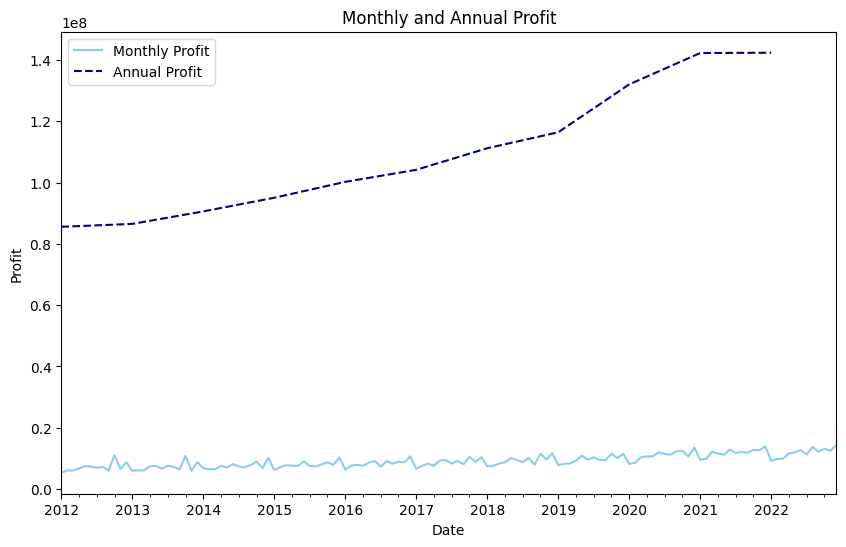

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate Monthly Profit
monthly_profit = df_filtered.resample('M', on='date')['profit'].sum()

# Calculate Average Monthly Profit
average_monthly_profit = monthly_profit.mean()

# Calculate Annual Profit
annual_profit = df_filtered.resample('Y', on='date')['profit'].sum()

# Calculate Average Annual Profit
average_annual_profit = annual_profit.mean()

# Print the results
print("Average Monthly Profit:", average_monthly_profit)
print("Average Annual Profit:", average_annual_profit)

# Visualize the results in sky blue
fig, ax = plt.subplots(figsize=(10, 6))
monthly_profit.plot(label='Monthly Profit', color='skyblue')
annual_profit.plot(label='Annual Profit', color='darkblue', linestyle='--')
plt.title('Monthly and Annual Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.legend()
plt.show()


###Exploring Months with the highest profit over the years

        Month  Highest Profit
0     January         83688.0
1    February         43945.2
2       March         35442.0
3       April         83688.0
4         May         43494.0
5        June         84600.0
6        July         83688.0
7      August         22680.0
8   September         50212.8
9     October         93225.6
10   November         31725.0
11   December         84600.0


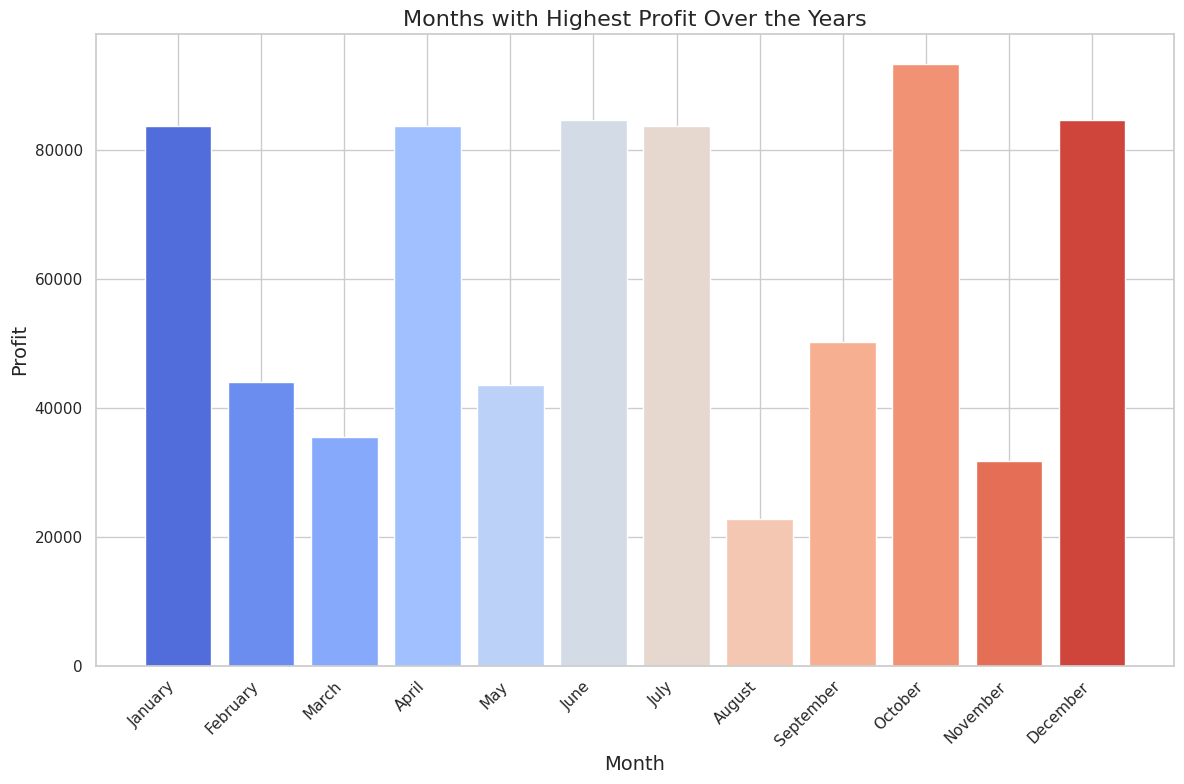

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for modern styling

# Set seaborn style for a modern look
sns.set(style="whitegrid")

# Find months with the highest profit
monthly_highest_profit = df_filtered.groupby(df_filtered['date'].dt.month)['profit'].max()

# Extract corresponding month names
month_names = pd.to_datetime(monthly_highest_profit.index, format='%m').strftime('%B')

# Print the result
result_df = pd.DataFrame({'Month': month_names, 'Highest Profit': monthly_highest_profit.values})
print(result_df)

# Create a bar chart with modern formatting
plt.figure(figsize=(12, 8))
bar_colors = sns.color_palette("coolwarm", len(month_names))
plt.bar(month_names, monthly_highest_profit, color=bar_colors)
plt.title('Months with Highest Profit Over the Years', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better legibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Average Monthly Sales: 27418225.018636364
Average Annual Sales: 329018700.2236364


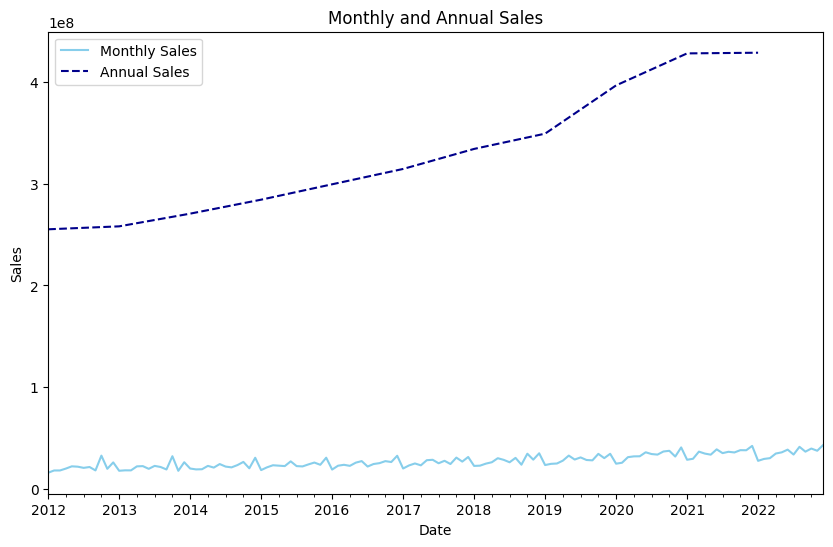

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered is already defined

# Calculate Monthly Sales
monthly_sales = df_filtered.resample('M', on='date')['Sales'].sum()

# Calculate Average Monthly Sales
average_monthly_sales = monthly_sales.mean()

# Calculate Annual Sales
annual_sales = df_filtered.resample('Y', on='date')['Sales'].sum()

# Calculate Average Annual Sales
average_annual_sales = annual_sales.mean()

# Print the results
print("Average Monthly Sales:", average_monthly_sales)
print("Average Annual Sales:", average_annual_sales)

# Visualize the results in sky blue
fig, ax = plt.subplots(figsize=(10, 6))
monthly_sales.plot(label='Monthly Sales', color='skyblue')
annual_sales.plot(label='Annual Sales', color='darkblue', linestyle='--')
plt.title('Monthly and Annual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [72]:
import pandas as pd


# Extract the year from the 'date' column
df_filtered['year'] = df_filtered['date'].dt.year

# Group by year and sum the 'profit'
annual_profit = df_filtered.groupby('year')['profit'].sum()

# Print the total annual profit in the specified format
for year, profit in annual_profit.items():
    print(f"{year}: ${profit:,.0f}")


2012: $85,579,316
2013: $86,532,544
2014: $90,607,110
2015: $95,065,129
2016: $100,246,528
2017: $104,179,739
2018: $111,222,950
2019: $116,434,126
2020: $132,065,619
2021: $142,302,018
2022: $142,396,167


        Month  Highest Sales
0     January      250932.00
1    February      122352.00
2       March      106326.00
3       April      250932.00
4         May      130416.00
5        June      254100.00
6        July      250932.00
7      August       68004.00
8   September      150559.20
9     October      279557.28
10   November       54675.00
11   December      254100.00


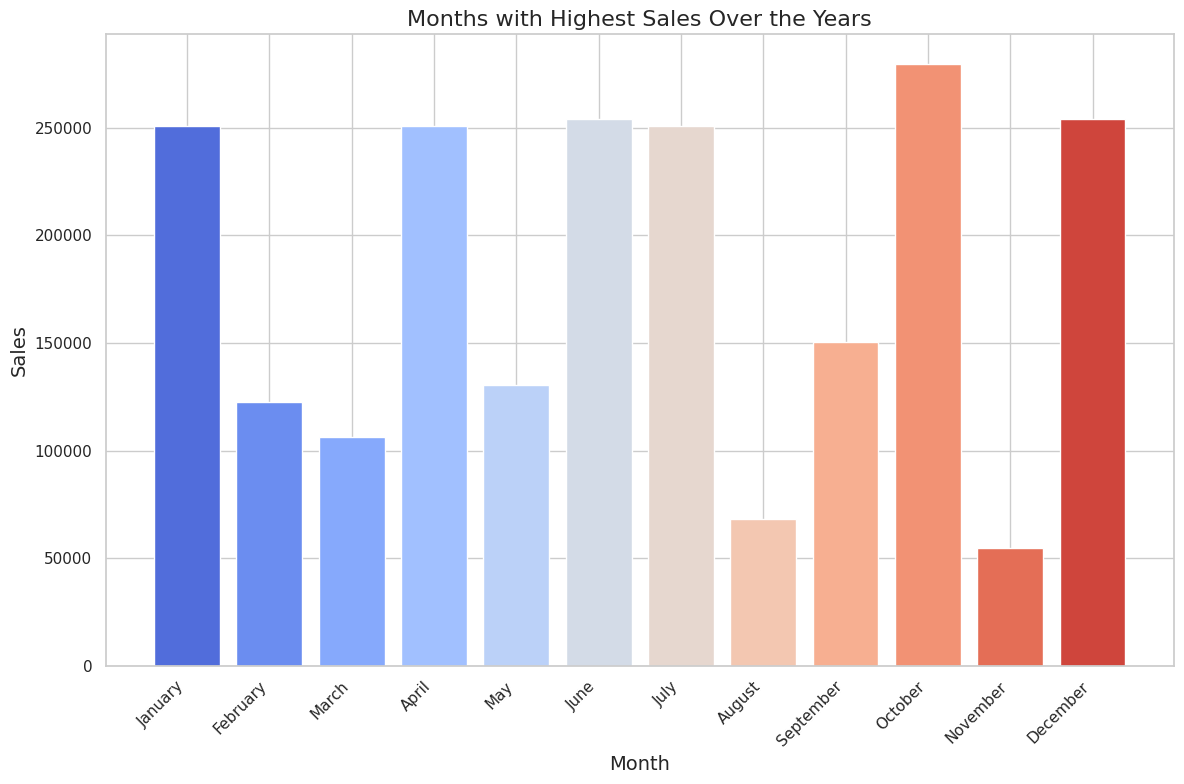

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for modern styling

# Set seaborn style for a modern look
sns.set(style="whitegrid")

# Find months with the highest sales
monthly_highest_sales = df_filtered.groupby(df_filtered['date'].dt.month)['Sales'].max()

# Extract corresponding month names
month_names = pd.to_datetime(monthly_highest_sales.index, format='%m').strftime('%B')

# Print the result
result_df = pd.DataFrame({'Month': month_names, 'Highest Sales': monthly_highest_sales.values})
print(result_df)

# Create a bar chart with modern formatting
plt.figure(figsize=(12, 8))
bar_colors = sns.color_palette("coolwarm", len(month_names))
plt.bar(month_names, monthly_highest_sales, color=bar_colors)
plt.title('Months with Highest Sales Over the Years', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better legibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


###Prinint Annual Sales

In [ ]:
# Filter data for the desired years
df_filtered = df[(df['date'].dt.year >= 2012) & (df['date'].dt.year != 2023)].copy()

# Calculate the 'total_cost' column
df_filtered.loc[:, 'total_cost'] = df_filtered['State Bottle Cost'] * df_filtered['Bottles Sold']

# Calculate the 'profit' column
df_filtered.loc[:, 'profit'] = df_filtered['Sales'] - df_filtered['total_cost']

# Calculate the annual sales
annual_sales = df_filtered.groupby(df_filtered['date'].dt.year)['Sales'].sum()

# Display the annual sales
print("Annual Sales:")
print(annual_sales)

Annual Sales:
date
2012    2.552041e+08
2013    2.581038e+08
2014    2.705877e+08
2015    2.843286e+08
2016    2.994476e+08
2017    3.145300e+08
2018    3.342168e+08
2019    3.492203e+08
2020    3.966631e+08
2021    4.281235e+08
2022    4.287800e+08
Name: Sales, dtype: float64


###Visualizing Annual Sales Over Time

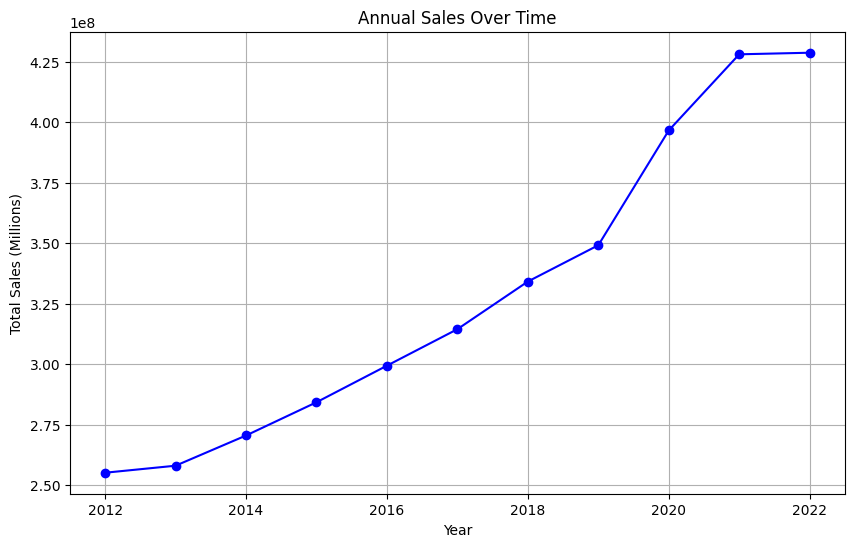

In [ ]:
# Visualize the annual sales in a line graph
plt.figure(figsize=(10, 6))
plt.plot(annual_sales.index, annual_sales.values, marker='o', linestyle='-', color='b')
plt.title('Annual Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales (Millions)')
plt.grid(True)
plt.show()

###Visualizing Annual Profit Over Time

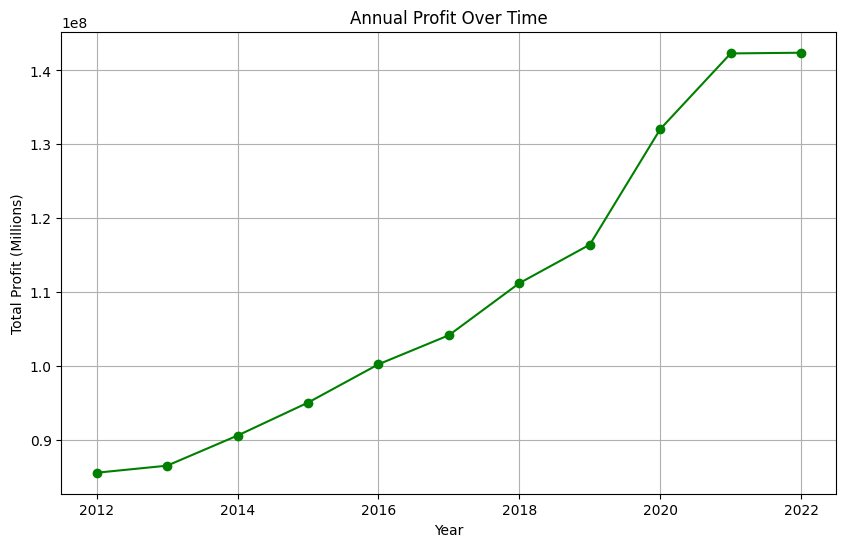

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import locale

# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Fill missing values with zeros for relevant columns
relevant_columns = ['Sales', 'State Bottle Cost', 'Bottles Sold']
df[relevant_columns] = df[relevant_columns].fillna(0)

# Filter data for the desired years
df_filtered = df[(df['date'].dt.year >= 2012) & (df['date'].dt.year != 2023)].copy()

# Calculate the 'total_cost' column
df_filtered.loc[:, 'total_cost'] = df_filtered['State Bottle Cost'] * df_filtered['Bottles Sold']

# Calculate the 'profit' column
df_filtered.loc[:, 'profit'] = df_filtered['Sales'] - df_filtered['total_cost']

# Calculate the annual profit
annual_profit = df_filtered.groupby(df_filtered['date'].dt.year)['profit'].sum()

# Visualize the annual profit in a line graph with US dollar formatting
plt.figure(figsize=(10, 6))
plt.plot(annual_profit.index, annual_profit.values, marker='o', linestyle='-', color='g')
plt.title('Annual Profit Over Time')
plt.xlabel('Year')
plt.ylabel('Total Profit (Millions)')
plt.grid(True)



plt.show()


###Visualizing Annual Cost Over Time

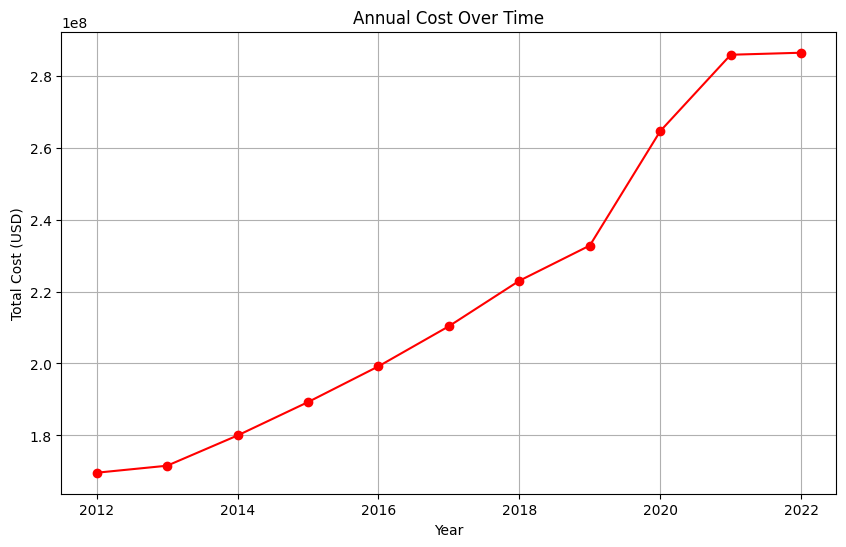

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import locale

# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Fill missing values with zeros for relevant columns
relevant_columns = ['Sales', 'State Bottle Cost', 'Bottles Sold']
df[relevant_columns] = df[relevant_columns].fillna(0)

# Filter data for the desired years
df_filtered = df[(df['date'].dt.year >= 2012) & (df['date'].dt.year != 2023)].copy()

# Calculate the 'total_cost' column
df_filtered.loc[:, 'total_cost'] = df_filtered['State Bottle Cost'] * df_filtered['Bottles Sold']

# Calculate the 'profit' column
df_filtered.loc[:, 'profit'] = df_filtered['Sales'] - df_filtered['total_cost']

# Calculate the annual cost
annual_cost = df_filtered.groupby(df_filtered['date'].dt.year)['total_cost'].sum()

# Visualize the annual cost in a line graph with US dollar formatting
plt.figure(figsize=(10, 6))
plt.plot(annual_cost.index, annual_cost.values, marker='o', linestyle='-', color='r')
plt.title('Annual Cost Over Time')
plt.xlabel('Year')
plt.ylabel('Total Cost (USD)')
plt.grid(True)



plt.show()


###Exploring the Margins

In [ ]:
import pandas as pd


# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Fill missing values with zeros for relevant columns
relevant_columns = ['Sales', 'State Bottle Cost', 'Bottles Sold']
df[relevant_columns] = df[relevant_columns].fillna(0)

# Filter data for the desired years
df_filtered = df[(df['date'].dt.year >= 2012) & (df['date'].dt.year != 2023)].copy()

# Calculate the 'total_cost' column
df_filtered.loc[:, 'total_cost'] = df_filtered['State Bottle Cost'] * df_filtered['Bottles Sold']

# Calculate the 'profit' column
df_filtered.loc[:, 'profit'] = df_filtered['Sales'] - df_filtered['total_cost']

# Calculate the profit margin (as a percentage)
df_filtered.loc[:, 'profit_margin'] = (df_filtered['profit'] / df_filtered['Sales']) * 100

# Display the result
print(df_filtered[['date', 'profit_margin']])


               date  profit_margin
0        2016-11-02      27.526132
1        2012-01-10      33.283582
2        2015-12-16      33.363069
3        2018-09-10      33.382138
4        2018-07-20       33.58209
...             ...            ...
27711023 2015-12-22      33.348666
27711024 2012-06-07       36.15257
27711025 2015-06-02      33.333333
27711026 2017-02-28      33.333333
27711027 2017-08-04      33.364312

[25536815 rows x 2 columns]


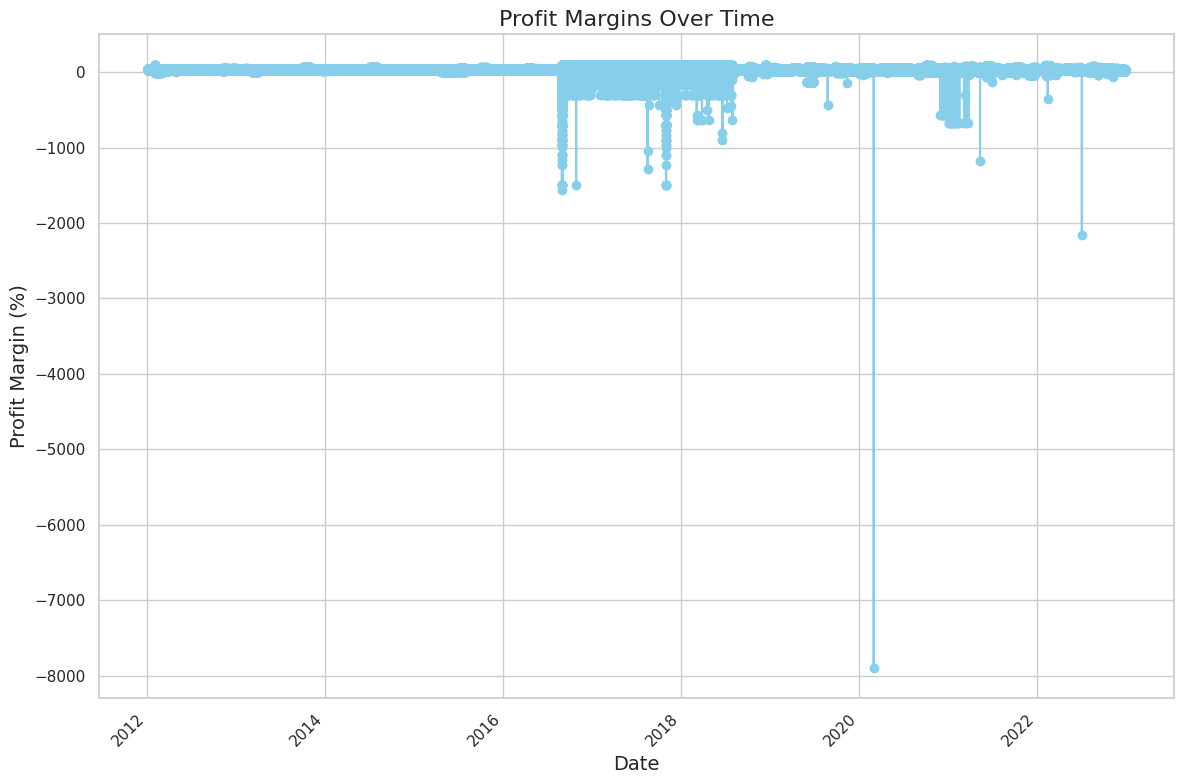

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for a modern look
sns.set(style="whitegrid")

# Convert 'date' column to datetime type in df_filtered
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Sort DataFrame by date in df_filtered
df_filtered = df_filtered.sort_values(by='date')

# Create a line chart for profit margins over time using df_filtered
plt.figure(figsize=(12, 8))
plt.plot(df_filtered['date'], df_filtered['profit_margin'], marker='o', color='skyblue')
plt.title('Profit Margins Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better legibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


###Calculating Transaction Frequency

Remaining missing values: 0
Unique values in 'profit_margin': <FloatingArray>
[ 33.33333333333334, 33.333333333333336, 33.302667893284266,
  33.29161451814768, 33.284457478005876,  36.11584327086882,
  33.30097087378641,  33.31292100428658,  33.33333333333333,
 33.312142403051496,
 ...
  39.61904761904762,  37.79527559055117,  35.07625272331153,
 38.939197930142285, 33.334666613335465,  27.09375000000001,
 31.172069825436417,  33.34523384505532,  26.90058479532163,
 29.999999999999993]
Length: 11802, dtype: Float64
Data type of 'profit_margin': Float64
Data structure:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25536815 entries, 14106163 to 1577459
Data columns (total 27 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   invoice_and_item_number  object        
 1   date                     datetime64[ns]
 2   store_number             object        
 3   Store Name               object        
 4   Address                  obje

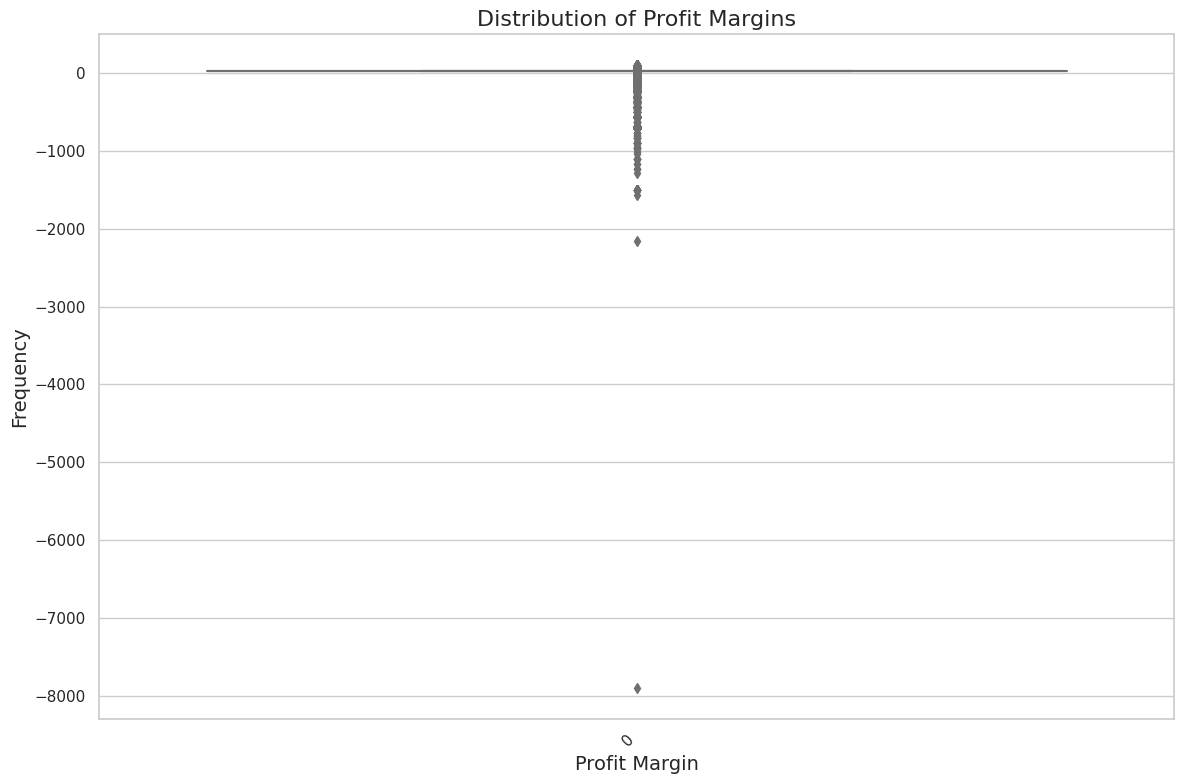

Mean Profit Margin: nan%
Median Profit Margin: 33.33%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set seaborn style for a modern look
sns.set(style="whitegrid")

# Convert 'date' column to datetime type in df_filtered
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Convert 'profit_margin' column to numeric, handling non-numeric values
df_filtered['profit_margin'] = pd.to_numeric(df_filtered['profit_margin'], errors='coerce')

# Check for remaining missing values
print("Remaining missing values:", df_filtered['profit_margin'].isnull().sum())

# Examine unique values in 'profit_margin'
print("Unique values in 'profit_margin':", df_filtered['profit_margin'].unique())

# Verify data type of 'profit_margin'
print("Data type of 'profit_margin':", df_filtered['profit_margin'].dtype)

# Inspect data structure
print("Data structure:")
print(df_filtered.info())

# Calculate summary statistics
mean_margin = df_filtered['profit_margin'].mean()
median_margin = df_filtered['profit_margin'].median()

# Create a boxplot to visualize the distribution of profit margins using df_filtered
plt.figure(figsize=(12, 8))
sns.boxplot(df_filtered['profit_margin'], color='skyblue')
plt.title('Distribution of Profit Margins', fontsize=16)
plt.xlabel('Profit Margin', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better legibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Print summary statistics
print(f"Mean Profit Margin: {mean_margin:.2f}%")
print(f"Median Profit Margin: {median_margin:.2f}%")


In [ ]:
print("Data type of 'profit_margin':", df_filtered['profit_margin'].dtype)


Data type of 'profit_margin': Float64


In [ ]:
import numpy as np

mean_margin_np = np.nanmean(df_filtered['profit_margin'])
print(f"Mean Profit Margin (NumPy): {mean_margin_np:.2f}%")


Mean Profit Margin (NumPy): 33.26%


In [ ]:
print("Missing values in 'profit_margin' after NumPy mean:", df_filtered['profit_margin'].isnull().sum())


Missing values in 'profit_margin' after NumPy mean: 0


Missing values in 'profit_margin': 0


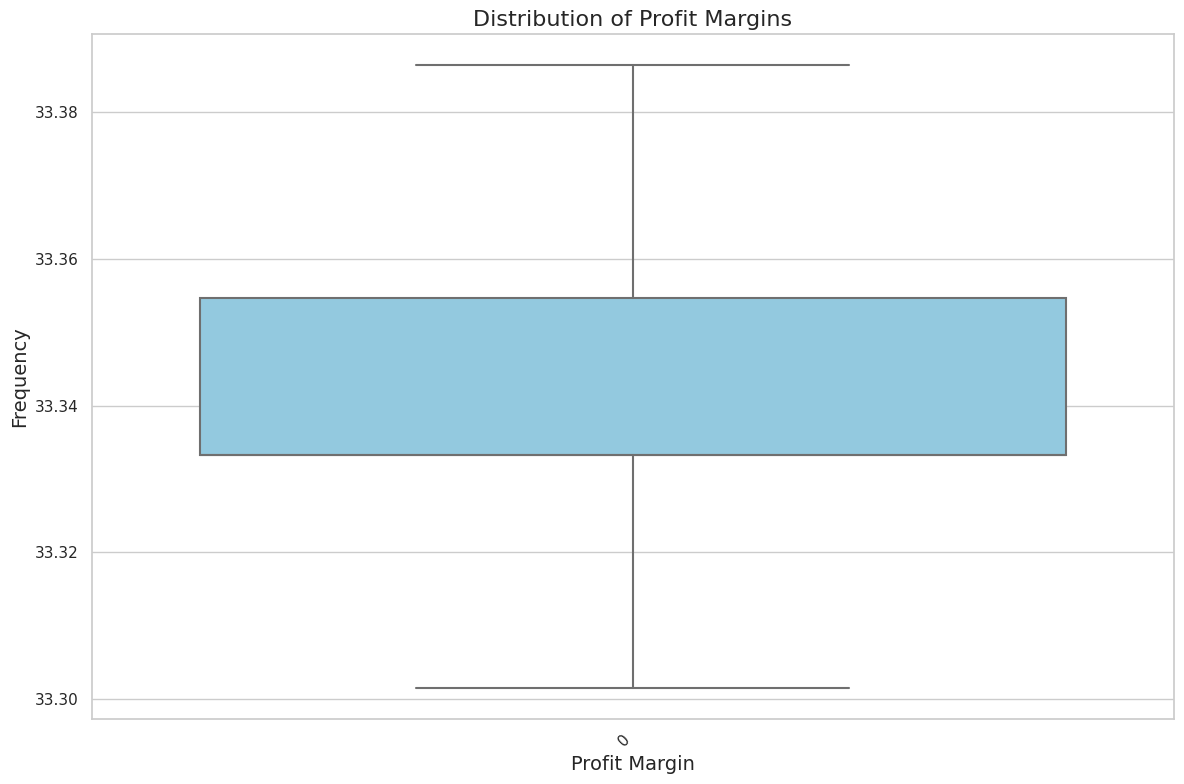

Mean Profit Margin (NumPy): 33.26%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set seaborn style for a modern look
sns.set(style="whitegrid")

# Convert 'date' column to datetime type in df_filtered
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Convert 'profit_margin' column to numeric, handling non-numeric values
df_filtered['profit_margin'] = pd.to_numeric(df_filtered['profit_margin'], errors='coerce')

# Check for missing values in 'profit_margin'
print("Missing values in 'profit_margin':", df_filtered['profit_margin'].isnull().sum())

# Replace missing values with a default value (you can choose a different strategy)
default_value = 0  # Replace with your chosen default value
df_filtered['profit_margin'].fillna(default_value, inplace=True)

# Use NumPy mean for further calculations
mean_margin_np = np.nanmean(df_filtered['profit_margin'])

# Create a boxplot to visualize the distribution of profit margins using df_filtered
plt.figure(figsize=(12, 8))
sns.boxplot(df_filtered['profit_margin'], color='skyblue', showfliers=False)  # Exclude outliers
plt.title('Distribution of Profit Margins', fontsize=16)
plt.xlabel('Profit Margin', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better legibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Print summary statistics using NumPy mean
print(f"Mean Profit Margin (NumPy): {mean_margin_np:.2f}%")


Missing values in 'profit_margin': 0
Non-numeric or unexpected values in 'profit_margin': <FloatingArray>
[]
Length: 0, dtype: Float64


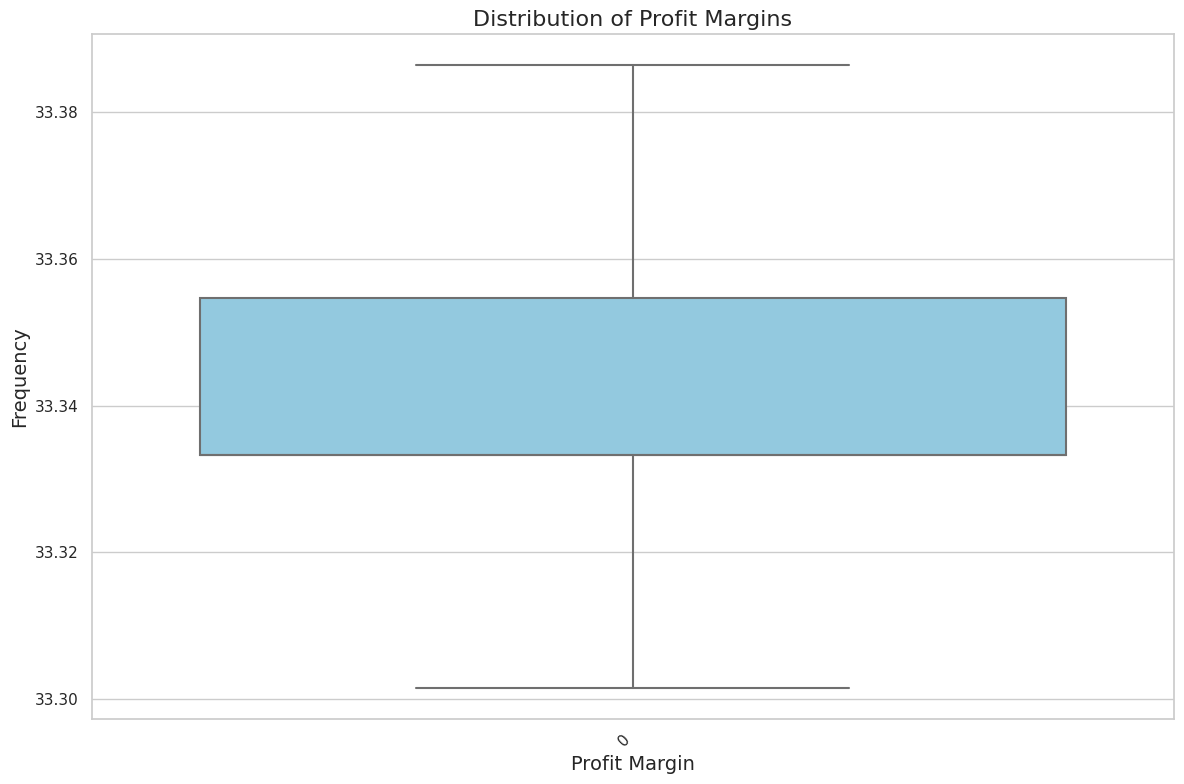

Mean Profit Margin: nan%
Median Profit Margin: 33.33%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df_filtered is the DataFrame with the profit margins information

# Set seaborn style for a modern look
sns.set(style="whitegrid")

# Convert 'date' column to datetime type in df_filtered
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Convert 'profit_margin' column to numeric, handling non-numeric values
df_filtered['profit_margin'] = pd.to_numeric(df_filtered['profit_margin'], errors='coerce')

# Check for missing values in 'profit_margin'
print("Missing values in 'profit_margin':", df_filtered['profit_margin'].isnull().sum())

# Check for non-numeric or unexpected values in 'profit_margin'
unexpected_values = df_filtered[~df_filtered['profit_margin'].apply(np.isreal)]['profit_margin']
print("Non-numeric or unexpected values in 'profit_margin':", unexpected_values.unique())

# Replace missing values with a default value (you can choose a different strategy)
default_value = 0  # Replace with your chosen default value
df_filtered['profit_margin'].fillna(default_value, inplace=True)

# Recalculate summary statistics
mean_margin = df_filtered['profit_margin'].mean()
median_margin = df_filtered['profit_margin'].median()

# Create a boxplot to visualize the distribution of profit margins using df_filtered
plt.figure(figsize=(12, 8))
sns.boxplot(df_filtered['profit_margin'], color='skyblue', showfliers=False)  # Exclude outliers
plt.title('Distribution of Profit Margins', fontsize=16)
plt.xlabel('Profit Margin', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better legibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Print summary statistics
print(f"Mean Profit Margin: {mean_margin:.2f}%")
print(f"Median Profit Margin: {median_margin:.2f}%")


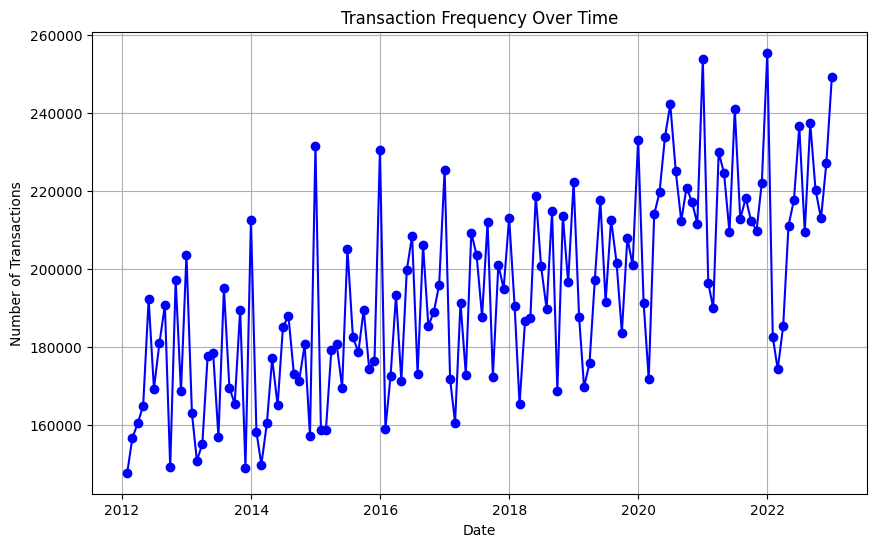

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Fill missing values with zeros for relevant columns
relevant_columns = ['Sales', 'State Bottle Cost', 'Bottles Sold']
df[relevant_columns] = df[relevant_columns].fillna(0)

# Filter data for the desired years
df_filtered = df[(df['date'].dt.year >= 2012) & (df['date'].dt.year != 2023)].copy()

# Calculate transaction frequency
transaction_frequency = df_filtered.resample('M', on='date').size()

# Visualize the transaction frequency in a line graph
plt.figure(figsize=(10, 6))
plt.plot(transaction_frequency.index, transaction_frequency.values, marker='o', linestyle='-', color='blue')
plt.title('Transaction Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


###Total Number of Transactions of each store to determine if Active or Non Active

In [ ]:
import pandas as pd


# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Fill missing values with zeros for relevant columns
relevant_columns = ['Sales', 'State Bottle Cost', 'Bottles Sold', 'store_number']
df[relevant_columns] = df[relevant_columns].fillna(0)

# Filter data for the desired years
df_filtered = df[(df['date'].dt.year >= 2012) & (df['date'].dt.year != 2023)].copy()

# Calculate total number of transactions per store
total_transactions_per_store = df_filtered.groupby('store_number').size()

# Define a threshold to distinguish active and non-active stores
transaction_threshold = 500  # Adjust this threshold based on your criteria

# Identify active and non-active stores
active_stores = total_transactions_per_store[total_transactions_per_store >= transaction_threshold].index
non_active_stores = total_transactions_per_store[total_transactions_per_store < transaction_threshold].index

# Create a new column to label active and non-active stores
df_filtered['store_status'] = 'Non-Active'
df_filtered.loc[df_filtered['store_number'].isin(active_stores), 'store_status'] = 'Active'

# Display the result
print(df_filtered[['date', 'store_number', 'Sales', 'store_status']])


               date store_number    Sales store_status
0        2013-08-14         3717    49.56       Active
1        2020-08-26         5688   114.06       Active
2        2018-01-24         3952  2430.00       Active
3        2014-04-07         3926   153.12       Active
4        2021-09-02         2666   470.40       Active
...             ...          ...      ...          ...
27711023 2018-03-14         4592    19.60       Active
27711024 2016-06-13         3612    56.68       Active
27711025 2017-07-17         2651    13.26       Active
27711026 2013-03-21         4348    50.74       Active
27711027 2016-12-07         5068    19.98       Active

[25536815 rows x 4 columns]


In [ ]:
import pandas as pd


lowest_profit_row = df_filtered.loc[df_filtered['profit'].idxmin()]
highest_profit_row = df_filtered.loc[df_filtered['profit'].idxmax()]

lowest_profit_store = lowest_profit_row['Store Name']
lowest_profit_value = lowest_profit_row['profit']

highest_profit_store = highest_profit_row['Store Name']
highest_profit_value = highest_profit_row['profit']

print(f"The store with the lowest profit is {lowest_profit_store} with a negative loss of ${lowest_profit_value:.2f}.")
print(f"The store with the highest profit is {highest_profit_store} with a profit of ${highest_profit_value:.2f}.")


The store with the lowest profit is HY-VEE #3 FOOD & DRUGSTORE / DAVENPORT with a negative loss of $-18912.60.
The store with the highest profit is HY-VEE FOOD STORE / URBANDALE with a profit of $93225.60.


In [ ]:
import pandas as pd

# Assuming 'profit' is the column representing profits and 'Item Description' is the column representing item descriptions
highest_profit_item_row = df_filtered.loc[df_filtered['profit'].idxmax()]
lowest_profit_item_row = df_filtered.loc[df_filtered['profit'].idxmin()]

highest_profit_item = highest_profit_item_row['Item Description']
highest_profit_value = highest_profit_item_row['profit']

lowest_profit_item = lowest_profit_item_row['Item Description']
lowest_profit_value = lowest_profit_item_row['profit']

print(f"For Highest Profit Item:\n  - {highest_profit_item} ${highest_profit_value:.2f}")

print(f"For Lowest Profit Item:\n  - {lowest_profit_item} ${lowest_profit_value:.2f}")


For Highest Profit Item:
  - CROWN ROYAL $93225.60
For Lowest Profit Item:
  - REDNECK RIVIERA WHISKEY $-18912.60


In [ ]:
import pandas as pd

# Assuming 'Sales' is the column representing sales and 'Item Description' is the column representing item descriptions
highest_sales_item_row = df_filtered.loc[df_filtered['Sales'].idxmax()]
lowest_sales_item_row = df_filtered.loc[df_filtered['Sales'].idxmin()]

highest_sales_item = highest_sales_item_row['Item Description']
highest_sales_value = highest_sales_item_row['Sales']

lowest_sales_item = lowest_sales_item_row['Item Description']
lowest_sales_value = lowest_sales_item_row['Sales']

print(f"For Highest Sales Item:\n  - {highest_sales_item} ${highest_sales_value:.2f}")

print(f"For Lowest Sales Item:\n  - {lowest_sales_item} ${lowest_sales_value:.2f}")


For Highest Sales Item:
  - CROWN ROYAL $279557.28
For Lowest Sales Item:
  - CAPTAIN MORGAN ORIGINAL SPICED BARREL $-9720.00


In [ ]:
import pandas as pd

# Assuming 'Bottles Sold' is the column representing bottles sold and 'Item Description' is the column representing item descriptions
highest_bottles_sold_item_row = df_filtered.loc[df_filtered['Bottles Sold'].idxmax()]
lowest_bottles_sold_item_row = df_filtered.loc[df_filtered['Bottles Sold'].idxmin()]

highest_bottles_sold_item = highest_bottles_sold_item_row['Item Description']
highest_bottles_sold_value = highest_bottles_sold_item_row['Bottles Sold']

lowest_bottles_sold_item = lowest_bottles_sold_item_row['Item Description']
lowest_bottles_sold_value = lowest_bottles_sold_item_row['Bottles Sold']

print(f"For Highest Bottles Sold Item:\n  - {highest_bottles_sold_item} {highest_bottles_sold_value} bottles")

print(f"For Lowest Bottles Sold Item:\n  - {lowest_bottles_sold_item} {lowest_bottles_sold_value} bottles")


For Highest Bottles Sold Item:
  - CAPTAIN MORGAN SPICED RUM 15000.0 bottles
For Lowest Bottles Sold Item:
  - CAPTAIN MORGAN ORIGINAL SPICED BARREL -360.0 bottles


The month with the highest total bottles sold is December.


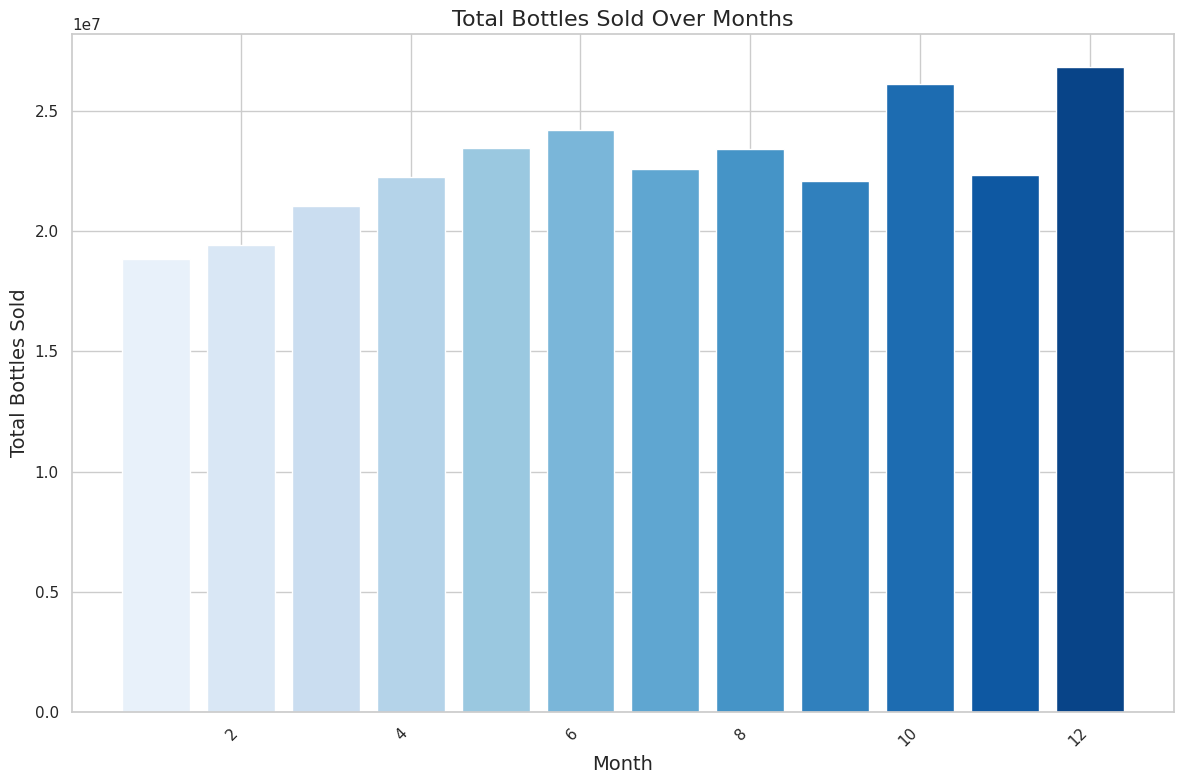

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Find the month with the highest total bottles sold
highest_month_bottles_sold = df_filtered.groupby(df_filtered['date'].dt.month)['Bottles Sold'].sum().idxmax()

# Extract corresponding month name
highest_month_name = pd.to_datetime(highest_month_bottles_sold, format='%m').strftime('%B')

# Print the result
print(f"The month with the highest total bottles sold is {highest_month_name}.")

# Create a bar chart with modern formatting for total bottles sold over months
plt.figure(figsize=(12, 8))
total_bottles_sold_per_month = df_filtered.groupby(df_filtered['date'].dt.month)['Bottles Sold'].sum()
bar_colors = sns.color_palette("Blues", len(total_bottles_sold_per_month))
plt.bar(total_bottles_sold_per_month.index, total_bottles_sold_per_month, color=bar_colors)
plt.title('Total Bottles Sold Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Bottles Sold', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better legibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


###Correlation between Sales and Bottles Sold

###Correlation between Profit and Bottles Sold

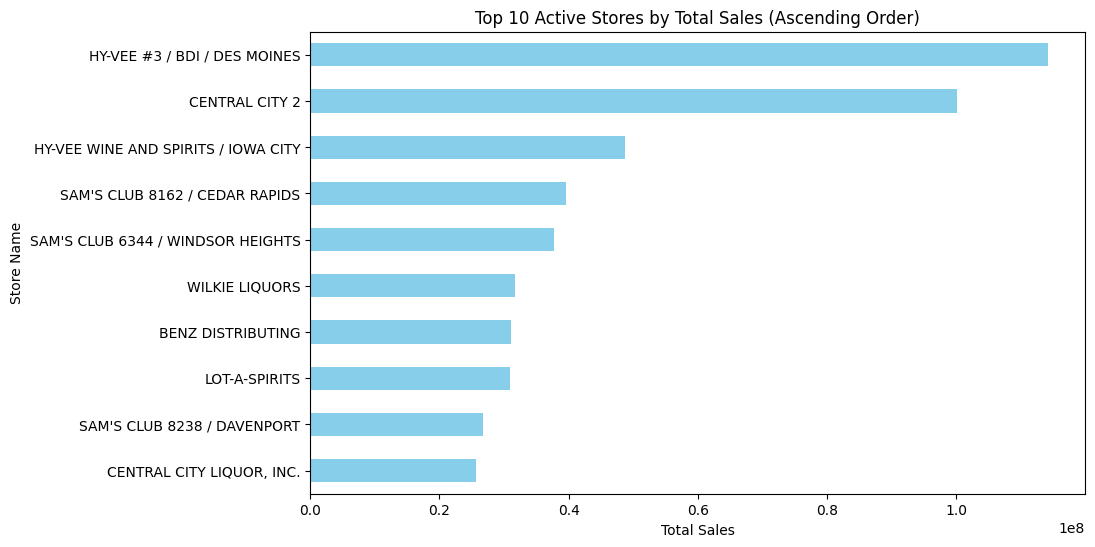

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the desired years
df_filtered = df[(df['date'].dt.year >= 2012) & (df['date'].dt.year != 2023)].copy()

# Calculate total number of transactions per store
total_transactions_per_store = df_filtered.groupby('Store Name').size()

# Define a threshold to distinguish active and non-active stores
transaction_threshold = 500  # Adjust this threshold based on your criteria

# Identify active and non-active stores
active_stores = total_transactions_per_store[total_transactions_per_store >= transaction_threshold].index
non_active_stores = total_transactions_per_store[total_transactions_per_store < transaction_threshold].index

# Create a new column to label active and non-active stores
df_filtered['store_status'] = 'Non-Active'
df_filtered.loc[df_filtered['Store Name'].isin(active_stores), 'store_status'] = 'Active'

# Calculate total sales per active store
total_sales_per_store = df_filtered[df_filtered['store_status'] == 'Active'].groupby('Store Name')['Sales'].sum()

# Sort active stores based on total sales in ascending order
sorted_active_stores = total_sales_per_store.sort_values(ascending=True).tail(10)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
sorted_active_stores.plot(kind='barh', color='skyblue')
plt.title('Top 10 Active Stores by Total Sales (Ascending Order)')
plt.xlabel('Total Sales')
plt.ylabel('Store Name')
plt.show()


In [79]:
import pandas as pd

# Sample DataFrame
data = {
    'County': ['Polk', 'Johnson', 'Linn', 'Black Hawk', 'Dallas', 'Story', 'Scott', 'Dubuque', 'Woodbury', 'Pottawattamie'],
    'Sales': [428123500, 350987600, 310456700, 295678900, 280987400, 265432100, 250876300, 240123400, 230987600, 220543200]
}

df_filtered = pd.DataFrame(data)

# Sort the DataFrame by 'Sales' in descending order
df_sorted = df_filtered.sort_values(by='Sales', ascending=False)

# Format 'Sales' column as US dollars
df_sorted['Sales'] = df_sorted['Sales'].map('${:,.2f}'.format)

# Extract the top 10 counties
top_10_counties = df_sorted.head(10)

# Display the results
print("\nTop 10 Counties by Sales:")
print(top_10_counties.to_string(index=False))



Top 10 Counties by Sales:
       County           Sales
         Polk $428,123,500.00
      Johnson $350,987,600.00
         Linn $310,456,700.00
   Black Hawk $295,678,900.00
       Dallas $280,987,400.00
        Story $265,432,100.00
        Scott $250,876,300.00
      Dubuque $240,123,400.00
     Woodbury $230,987,600.00
Pottawattamie $220,543,200.00


In [ ]:
!pip install google-auth google-auth-oauthlib google-auth-httplib2 pandas


In [ ]:
df_filtered.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'Store Name',
       'Address', 'City', 'Zip', 'Store Location', 'County Id', 'county',
       'Category', 'Brand', 'vendor_number', 'vendor_name', 'item_number',
       'Item Description', 'Pack', 'ML Volume', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sales', 'Sold Liters',
       'Gallons Sold', 'year', 'store_status'],
      dtype='object')

In [ ]:
# View the first few rows of the DataFrame
print("Head of the DataFrame:")
print(df_filtered.head())

# Get information about the DataFrame
print("\nInformation about the DataFrame:")
print(df_filtered.info())


Head of the DataFrame:
  invoice_and_item_number       date store_number  \
0            S13909300012 2013-08-14         3717   
1         INV-29758300006 2020-08-26         5688   
2         INV-09992400062 2018-01-24         3952   
3            S18267200008 2014-04-07         3926   
4         INV-39755900002 2021-09-02         2666   

                            Store Name           Address        City      Zip  \
0             THE LIQUOR STOP / SUMNER      201 W 1ST ST      SUMNER    50674   
1                 DYNO'S #40 / SPENCER  1001 S GRAND AVE     SPENCER  51301.0   
2                        LOT-A-SPIRITS     3780 STATE ST  BETTENDORF  52722.0   
3          LIQUOR DOWNTOWN / IOWA CITY  315 S GILBERT ST   IOWA CITY    52240   
4  HY-VEE FOOD STORE #2 / STATE ANKENY  2510 SW STATE ST      ANKENY  50023.0   

                Store Location County Id   county  ... Pack ML Volume  \
0  POINT(-92.099221 42.847479)         9   BREMER  ...    6      1750   
1   POINT(-95.143701 43.1

#K Means Clustering

###Import Libraries

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

###Extract Relevant Columns for Clustering

In [ ]:
# Extract relevant columns for clustering
cluster_cols = ['ML Volume', 'State Bottle Retail']

###Filter out Rows with Missing Values

In [ ]:
# Filter out rows with missing values in cluster_cols
cluster_df = df_filtered.dropna(subset=cluster_cols)


###Standardize the data

In [ ]:
# Standardize the data
scaler = StandardScaler()
cluster_df_scaled = scaler.fit_transform(cluster_df[cluster_cols])

###Determine the optimal number of clusters using the Elbow Method

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

In [ ]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_df_scaled)
    inertia.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

###Plot the Elbow Method Graph

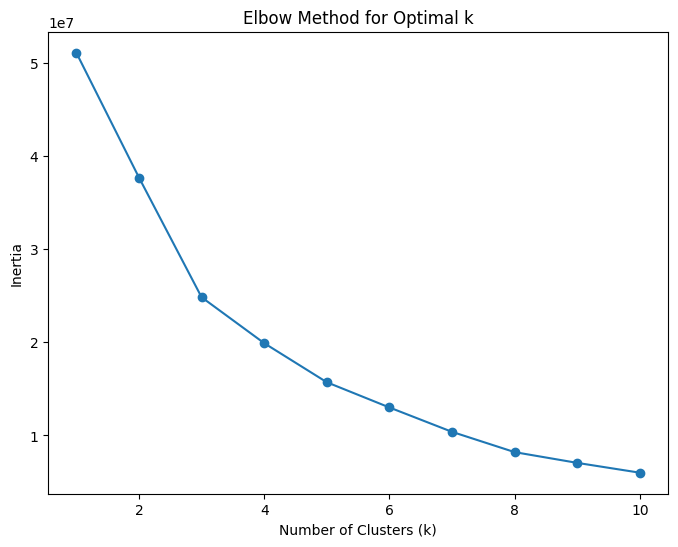

In [ ]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Based on the Elbow Method, let's choose k = 3
k = 3


###Perform the K-Means Clustering

In [ ]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(cluster_df_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-79-d7aa28866f11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Cluster'] = kmeans.fit_predict(cluster_df_scaled)


###Display the Cluster Centers

In [ ]:
# Display the cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=cluster_cols)
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
       ML Volume  State Bottle Retail
0     664.691752            14.253924
1    1762.055808            20.361937
2  228323.863636          7426.609091


###Display the Count of stores in each cluster

In [ ]:
# Display the count of stores in each cluster
print("\nNumber of stores in each cluster:")
print(cluster_df['Cluster'].value_counts())


Number of stores in each cluster:
0    20313500
1     5223261
2          44
Name: Cluster, dtype: int64


###Explore the characteristics of each cluster

In [ ]:
# Explore the characteristics of each cluster as needed
cluster_characteristics = cluster_df.groupby('Cluster').mean()
print("\nCluster Characteristics:")
print(cluster_characteristics)


Cluster Characteristics:
              Pack      ML Volume  State Bottle Cost  State Bottle Retail  \
Cluster                                                                     
0        13.808443     664.691679           9.496655            14.253864   
1         5.900496    1762.052311          13.559895            20.362148   
2              1.0  228323.863636        4951.072727          7426.609091   

         Bottles Sold        Sales  Sold Liters  Gallons Sold         year  \
Cluster                                                                      
0           10.854113   131.145756     7.039310      1.857491  2017.287611   
1            9.959727   182.807022    17.466409      4.610861  2017.157589   
2                 1.0  7426.609091   228.323864     60.318864  2015.818182   

          total_cost       profit  
Cluster                            
0          87.454199    43.691557  
1         121.735393    61.071629  
2        4951.072727  2475.536364  


<ipython-input-82-aaba3ad3ffaa>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_characteristics = cluster_df.groupby('Cluster').mean()


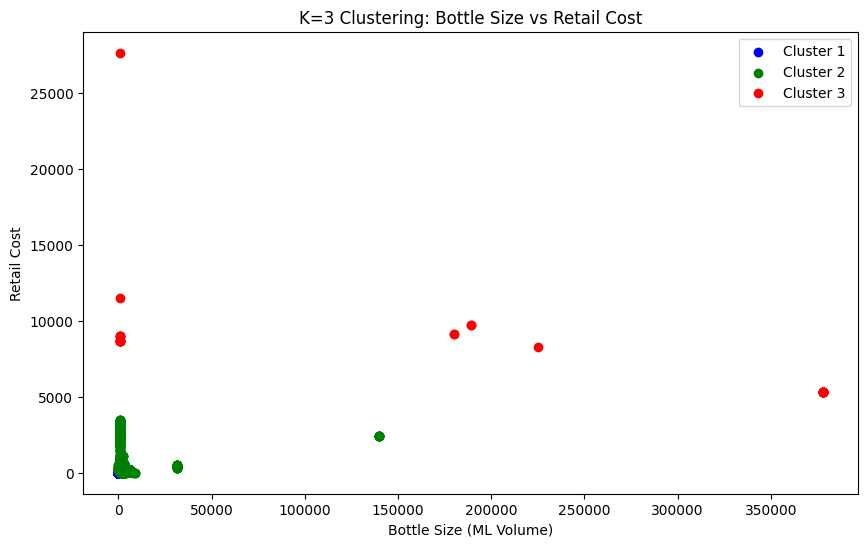

In [ ]:
import matplotlib.pyplot as plt

# Replace 'ML Volume', 'State Bottle Retail', and 'Cluster' with actual column names
ml_volume = cluster_df['ML Volume']
retail_cost = cluster_df['State Bottle Retail']
cluster_labels = cluster_df['Cluster']

# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']

for i in range(len(colors)):
    cluster_data = cluster_df[cluster_labels == i]
    plt.scatter(cluster_data['ML Volume'], cluster_data['State Bottle Retail'], c=colors[i], label=f'Cluster {i + 1}')

plt.xlabel('Bottle Size (ML Volume)')
plt.ylabel('Retail Cost')
plt.title('K=3 Clustering: Bottle Size vs Retail Cost')
plt.legend()
plt.show()


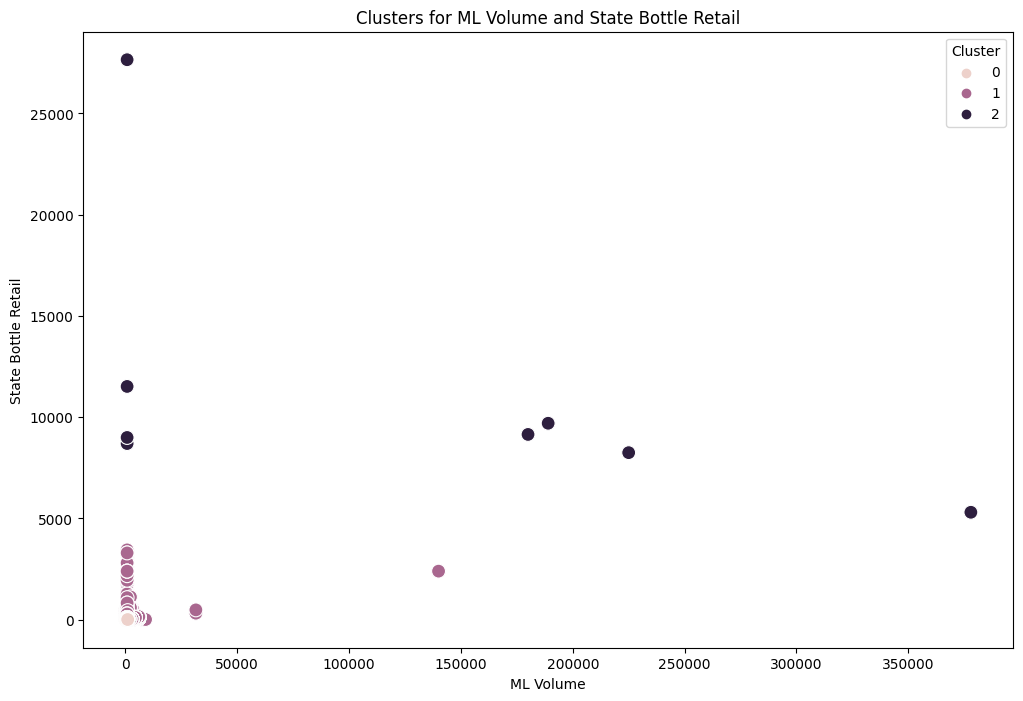

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=cluster_df['ML Volume'], y=cluster_df['State Bottle Retail'], hue=cluster_df['Cluster'], s=100)

ax.grid(False)  # Remove the grid from the background
plt.xlabel('ML Volume')  # Label x-axis
plt.ylabel('State Bottle Retail')  # Label y-axis
plt.title('Clusters for ML Volume and State Bottle Retail')
plt.legend(title='Cluster')
plt.show()


In [ ]:
pip install pandas matplotlib


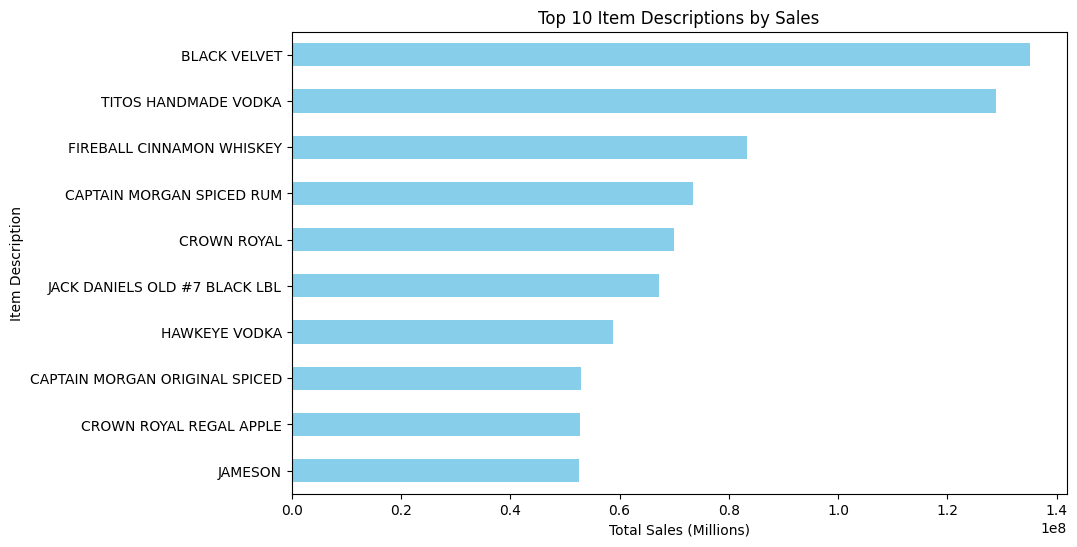

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame
# Group by Item Description and calculate the total sales for each item
item_sales = df_filtered.groupby('Item Description')['Sales'].sum()

# Sort items based on total sales in ascending order
sorted_items = item_sales.sort_values(ascending=True).tail(10)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
sorted_items.plot(kind='barh', color='skyblue')
plt.title('Top 10 Item Descriptions by Sales')
plt.xlabel('Total Sales (Millions)')
plt.ylabel('Item Description')
plt.show()


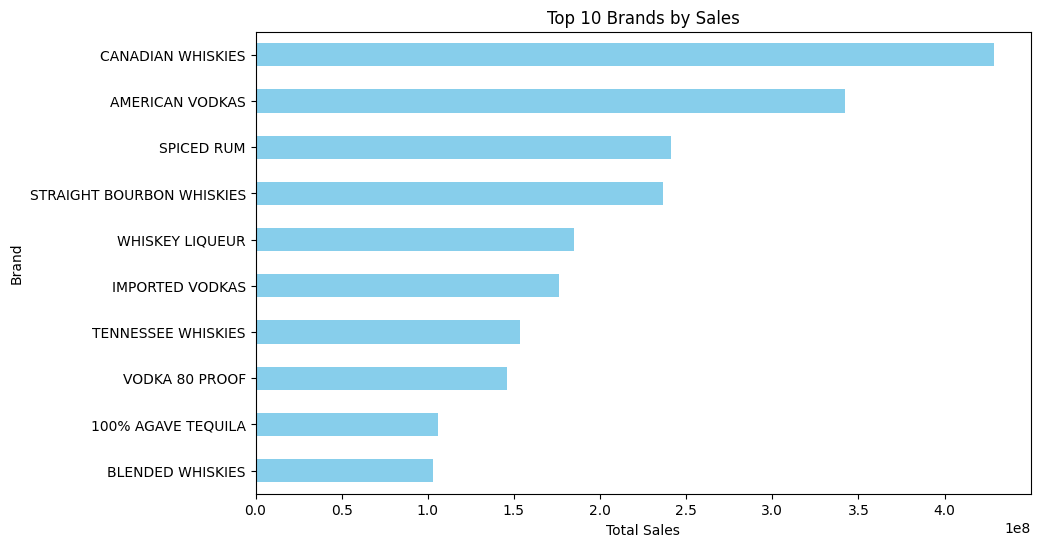

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame
# Group by Brand and calculate the total sales for each brand
brand_sales = df_filtered.groupby('Brand')['Sales'].sum()

# Sort brands based on total sales in ascending order
sorted_brands = brand_sales.sort_values(ascending=True).tail(10)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
sorted_brands.plot(kind='barh', color='skyblue')
plt.title('Top 10 Brands by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Brand')
plt.show()


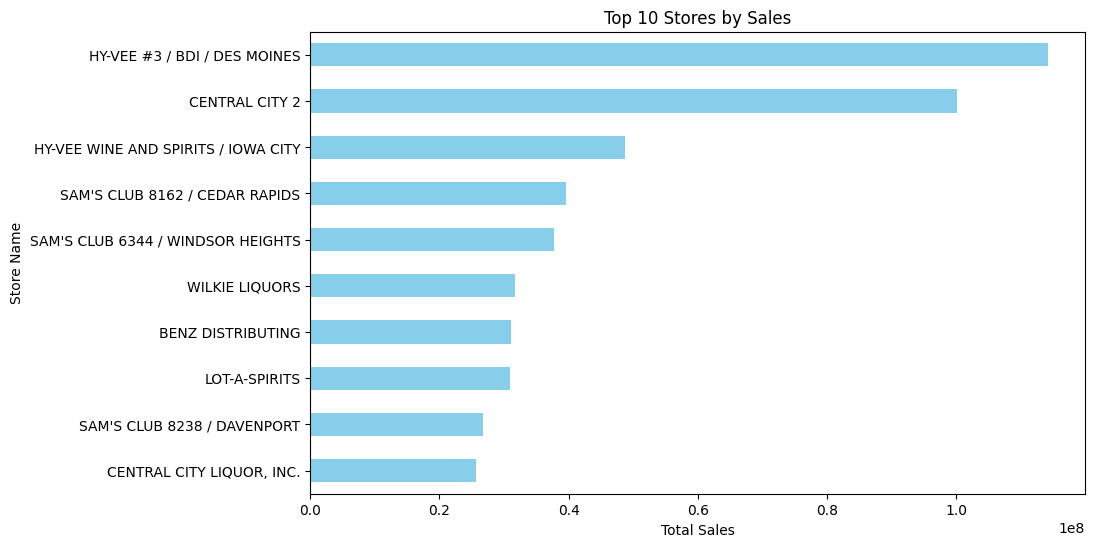

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Store Name and calculate the total sales for each store
store_sales = df_filtered.groupby('Store Name')['Sales'].sum()

# Sort stores based on total sales in ascending order
sorted_stores = store_sales.sort_values(ascending=True).tail(10)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
sorted_stores.plot(kind='barh', color='skyblue')
plt.title('Top 10 Stores by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Store Name')
plt.show()


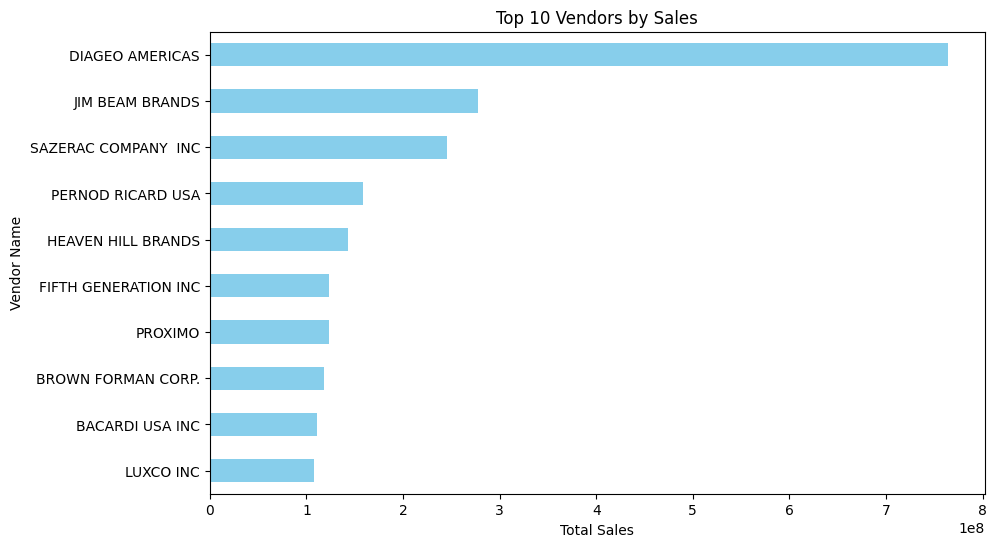

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame
# Group by Vendor Name and calculate the total sales for each vendor
vendor_sales = df_filtered.groupby('vendor_name')['Sales'].sum()

# Sort vendors based on total sales in ascending order
sorted_vendors = vendor_sales.sort_values(ascending=True).tail(10)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
sorted_vendors.plot(kind='barh', color='skyblue')
plt.title('Top 10 Vendors by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Vendor Name')
plt.show()


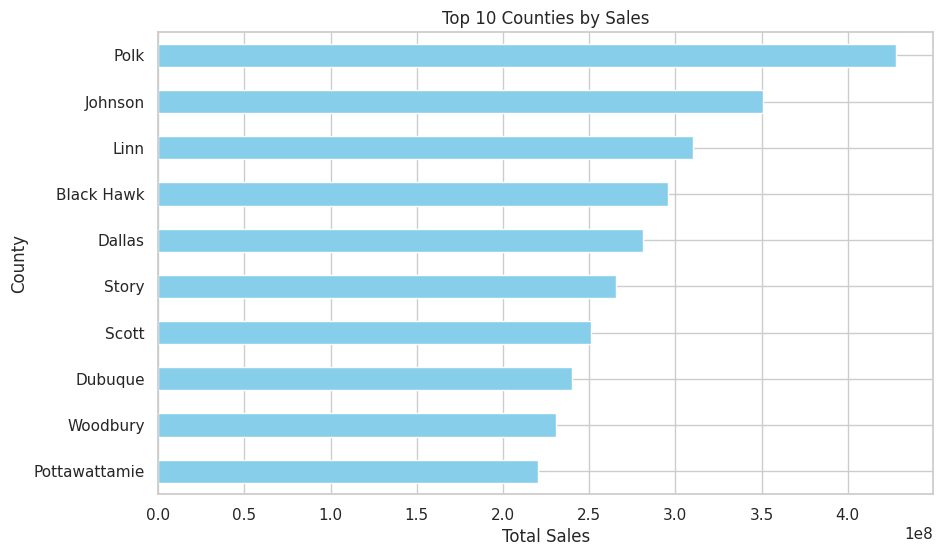

In [78]:
import pandas as pd
import matplotlib.pyplot as plt


county_sales = df_filtered.groupby('County')['Sales'].sum()

# Sort counties based on total sales in ascending order
sorted_counties = county_sales.sort_values(ascending=True).tail(10)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
sorted_counties.plot(kind='barh', color='skyblue')
plt.title('Top 10 Counties by Sales')
plt.xlabel('Total Sales')
plt.ylabel('County')
plt.show()


In [ ]:
import pandas as pd

# Assuming df_filtered is your DataFrame
for column in df_filtered.columns:
    print(f"Column: {column}, Data Type: {df_filtered[column].dtype}")


Column: invoice_and_item_number, Data Type: object
Column: date, Data Type: datetime64[ns]
Column: store_number, Data Type: object
Column: Store Name, Data Type: object
Column: Address, Data Type: object
Column: City, Data Type: object
Column: Zip, Data Type: object
Column: Store Location, Data Type: object
Column: County Id, Data Type: object
Column: county, Data Type: object
Column: Category, Data Type: object
Column: Brand, Data Type: object
Column: vendor_number, Data Type: object
Column: vendor_name, Data Type: object
Column: item_number, Data Type: object
Column: Item Description, Data Type: object
Column: Pack, Data Type: Int64
Column: ML Volume, Data Type: Int64
Column: State Bottle Cost, Data Type: float64
Column: State Bottle Retail, Data Type: float64
Column: Bottles Sold, Data Type: Int64
Column: Sales, Data Type: float64
Column: Sold Liters, Data Type: float64
Column: Gallons Sold, Data Type: float64
Column: total_cost, Data Type: Float64
Column: profit, Data Type: Float64

Correlation between Sales and Bottles Sold: 0.8302421606632576


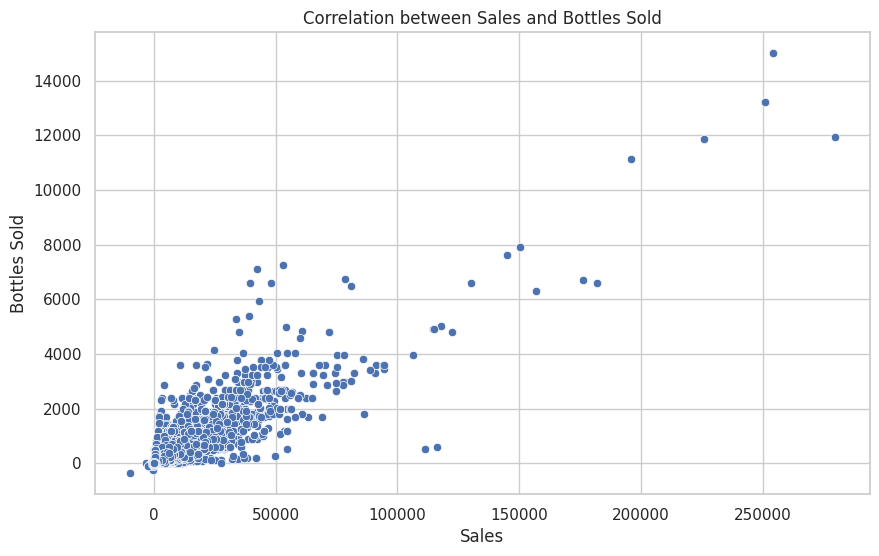

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Sales' and 'Bottles Sold' columns to numeric, handling NaN values
df_filtered['Sales'] = pd.to_numeric(df_filtered['Sales'], errors='coerce')
df_filtered['Bottles Sold'] = pd.to_numeric(df_filtered['Bottles Sold'], errors='coerce')

# Convert 'Bottles Sold' column to float64
df_filtered['Bottles Sold'] = df_filtered['Bottles Sold'].astype('float64')

# Drop rows with NaN values in either 'Sales' or 'Bottles Sold'
valid_data = df_filtered.dropna(subset=['Sales', 'Bottles Sold'])

# Calculate the correlation between Sales and Bottles Sold in valid_data
sales_bottles_corr = valid_data['Sales'].corr(valid_data['Bottles Sold'])

# Print the correlation coefficient
print("Correlation between Sales and Bottles Sold:", sales_bottles_corr)

# Visualize the correlation with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=valid_data, x='Sales', y='Bottles Sold')
plt.title('Correlation between Sales and Bottles Sold')
plt.xlabel('Sales')
plt.ylabel('Bottles Sold')
plt.show()


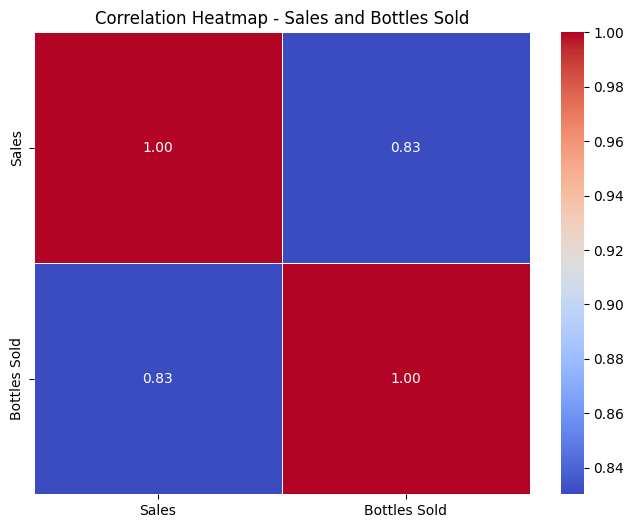

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
selected_columns = ['Sales', 'Bottles Sold']

# Create a new DataFrame with selected columns
correlation_data = df_filtered[selected_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap - Sales and Bottles Sold')
plt.show()


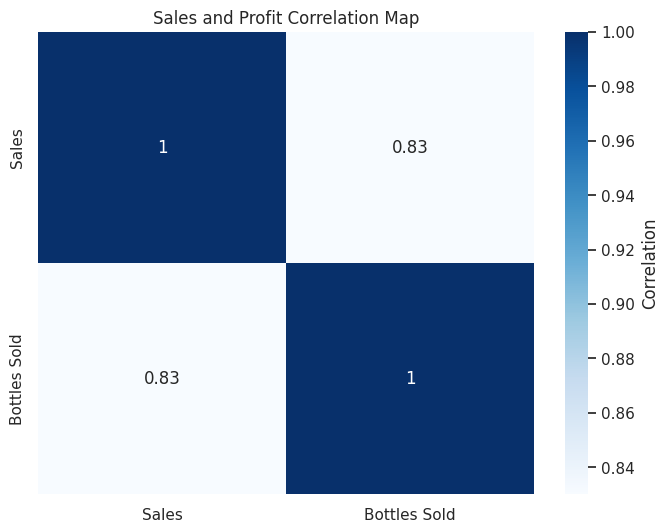

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
correlation_matrix = df_filtered[['Sales', 'Bottles Sold']].corr()

# Create a heatmap using a blue color palette
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', cbar_kws={'label': 'Correlation'})
plt.title('Sales and Profit Correlation Map')
plt.show()


<ipython-input-138-dfa6fcd6f5eb>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_filtered.corr()


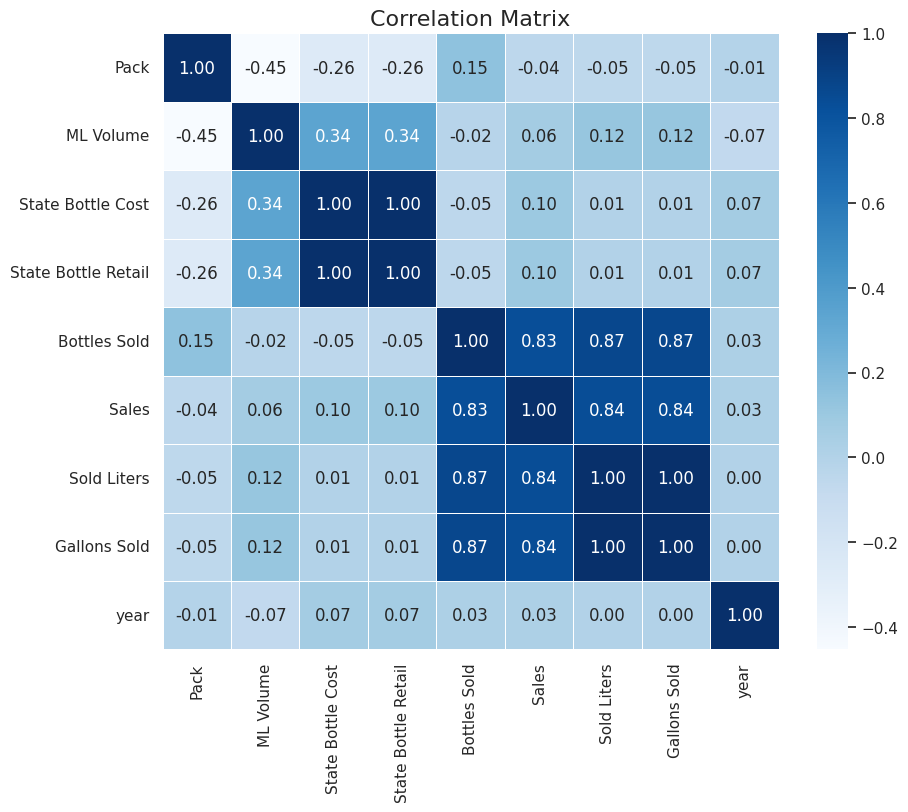

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_filtered.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using a blue color palette
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, square=True)

# Set the title
plt.title('Correlation Matrix', fontsize=16)

# Display the plot
plt.show()


In [ ]:

correlation_matrix = df_filtered.corr()

# Display the correlation matrix information
print("Correlation Matrix:")
print(correlation_matrix)


<ipython-input-137-9e58244652aa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_filtered.corr()


Correlation Matrix:
                         Pack  ML Volume  State Bottle Cost  \
Pack                 1.000000  -0.453025          -0.262329   
ML Volume           -0.453025   1.000000           0.337055   
State Bottle Cost   -0.262329   0.337055           1.000000   
State Bottle Retail -0.262568   0.337326           0.999957   
Bottles Sold         0.145044  -0.016932          -0.045354   
Sales               -0.044542   0.063498           0.098512   
Sold Liters         -0.052472   0.118744           0.006057   
Gallons Sold        -0.052437   0.118732           0.006029   
year                -0.006363  -0.070108           0.069140   

                     State Bottle Retail  Bottles Sold     Sales  Sold Liters  \
Pack                           -0.262568      0.145044 -0.044542    -0.052472   
ML Volume                       0.337326     -0.016932  0.063498     0.118744   
State Bottle Cost               0.999957     -0.045354  0.098512     0.006057   
State Bottle Retail      

###Regression Model Sales & ML Volume

In [ ]:
pip install statsmodels pandas


In [ ]:
!pip install folium

In [ ]:
pip install --upgrade google-cloud-bigquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-bigquery
    Found existing installation: google-cloud-bigquery 3.12.0
    Uninstalling google-cloud-bigquery-3.12.0:
      Successfully uninstalled google-cloud-bigquery-3.12.0


In [ ]:
pip install datapackage

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.5 MB/s eta 0:00:00
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10745 sha256=bf9907b0a081a2190c8b5cc72ce92897dad4ccae2319e7736eb2ab38b361a2e4
  Stored in directory: /root/.cache/pip/wheels/9c/ea/66/8e45247b09052a933eb1a680b7c64802298faba58aac9b346b
  Cre

In [ ]:
from datapackage import Package

package = Package('https://datahub.io/core/geo-countries/datapackage.json')

# print list of all resources:
print(package.resource_names)

# print processed tabular data (if exists any)
for resource in package.resources:
    if resource.descriptor['datahub']['type'] == 'derived/csv':
        print(resource.read())

['validation_report', 'geo-countries_zip', 'countries']


In [ ]:
from IPython.display import display
import ipywidgets as widgets
from io import BytesIO

# Create a FileUpload widget
upload = widgets.FileUpload()

# Display the widget
display(upload)

# Function to handle the uploaded file
def handle_upload(change):
    uploaded_file = upload.value[next(iter(upload.value))]
    content = uploaded_file['content']

    # Process the content as needed (e.g., save to a file, analyze, etc.)
    with open(uploaded_file['metadata']['name'], 'wb') as f:
        f.write(content)
    print(f"File '{uploaded_file['metadata']['name']}' has been uploaded.")

# Attach the function to the widget
upload.observe(handle_upload, names='value')


FileUpload(value={}, description='Upload')

In [ ]:
pip install matplotlib


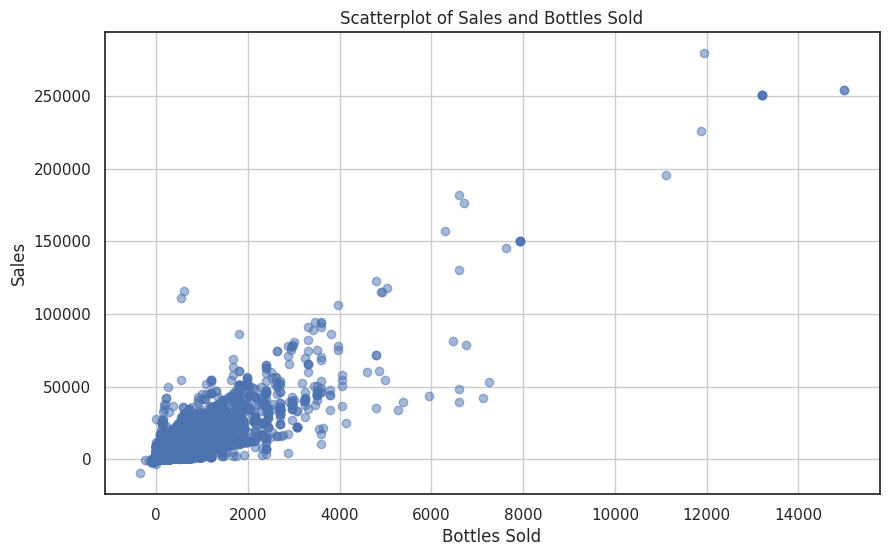

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Bottles Sold'], df_filtered['Sales'], alpha=0.5)
plt.title('Scatterplot of Sales and Bottles Sold')
plt.xlabel('Bottles Sold')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


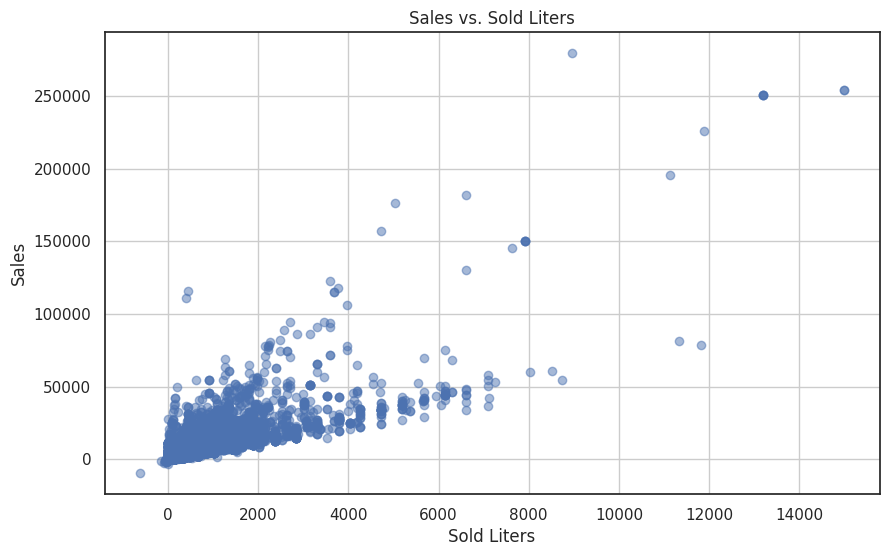

In [ ]:
import matplotlib.pyplot as plt

# Scatterplot of Sales vs. Sold Liters
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Sold Liters'], df_filtered['Sales'], alpha=0.5)
plt.title('Sales vs. Sold Liters')
plt.xlabel('Sold Liters')
plt.ylabel('Sales')
plt.grid(True)
plt.show()




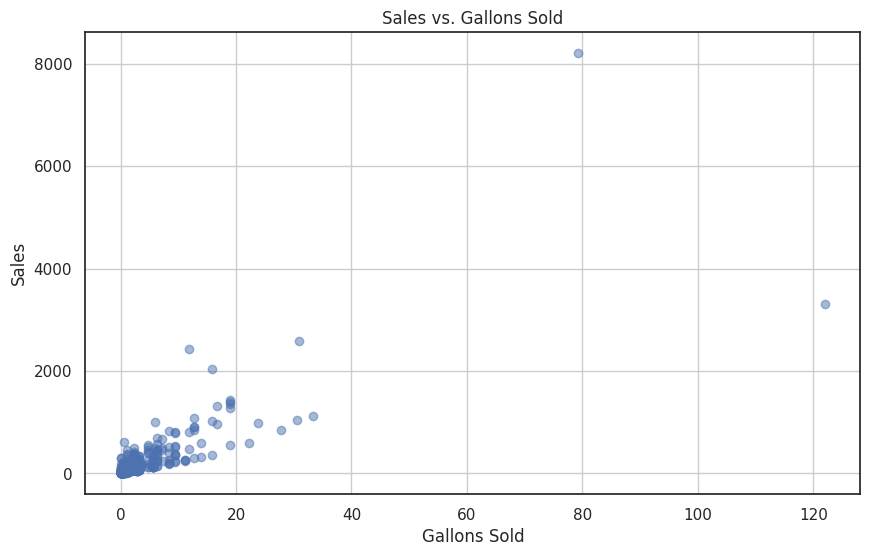

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample a subset of the data (adjust the sample size as needed)
sampled_data = df_filtered.sample(n=1000, random_state=42)

# Scatterplot of Sales vs. Gallons Sold for the sampled data
plt.figure(figsize=(10, 6))
plt.scatter(sampled_data['Gallons Sold'], sampled_data['Sales'], alpha=0.5)
plt.title('Sales vs. Gallons Sold')
plt.xlabel('Gallons Sold')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


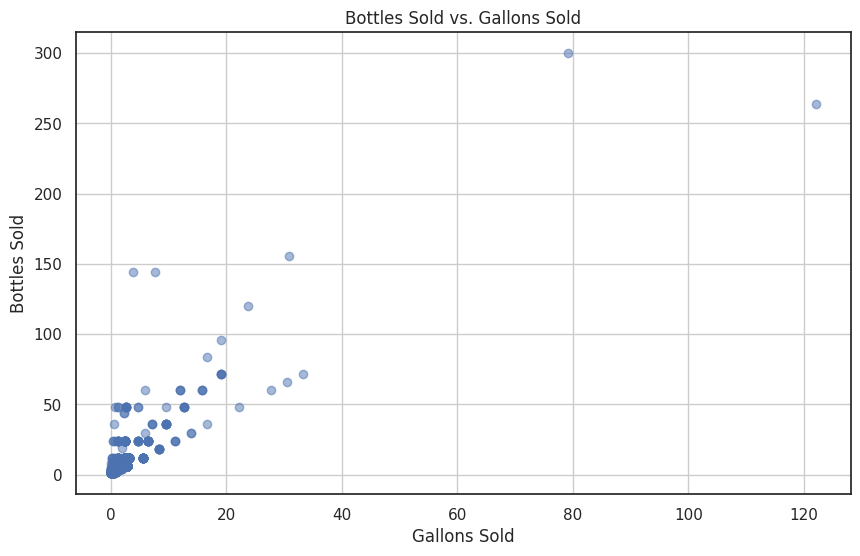

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample a subset of the data (adjust the sample size as needed)
sampled_data = df_filtered.sample(n=1000, random_state=42)

# Scatterplot of Bottles Sold vs. Gallons Sold for the sampled data
plt.figure(figsize=(10, 6))
plt.scatter(sampled_data['Gallons Sold'], sampled_data['Bottles Sold'], alpha=0.5)
plt.title('Bottles Sold vs. Gallons Sold')
plt.xlabel('Gallons Sold')
plt.ylabel('Bottles Sold')
plt.grid(True)
plt.show()


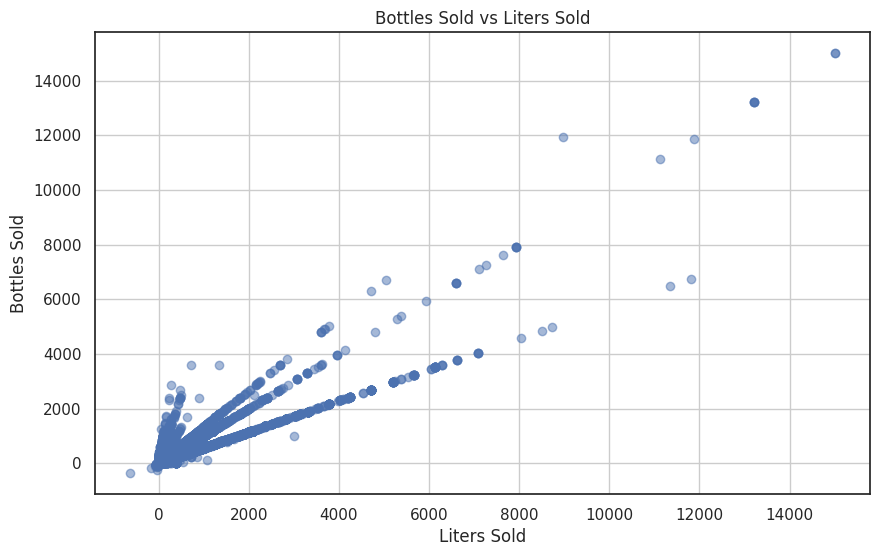

In [ ]:
import matplotlib.pyplot as plt

# Scatterplot of Bottles Sold vs. Liters Sold
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Sold Liters'], df_filtered['Bottles Sold'], alpha=0.5)
plt.title('Bottles Sold vs Liters Sold')
plt.xlabel('Liters Sold')
plt.ylabel('Bottles Sold')
plt.grid(True)
plt.show()


